In [20]:
%pip install statsmodels

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/9.9 MB ? eta -:--:--
                                              0.2/9.9 MB 5.3 MB/s eta 0:00:02
     --                                       0.7/9.9 MB 8.4 MB/s eta 0:00:02
     ---                                      0.9/9.9 MB 7.8 MB/s eta 0:00:02
     ------                                   1.6/9.9 MB 9.4 MB/s eta 0:00:01
     ------                                   1.6/9.9 MB 9.4 MB/s eta 0:00:01
     ------                                   1.6/9.9 MB 9.4 MB/s eta 0:00:01
     ------                                   1.6/9.9 MB 9.4 MB/s eta 0:00:01
     ------                                   1.6/9.9 MB 9.4 MB/s eta 0:00:01
     --------                                 2.2/9.9 MB 5.3 MB/s eta 0:00:02
     -----------                              2.7/9.9 MB 6.0 MB/s eta 0:00:02
     ------------                             3.2/9.9 MB 6.3 MB/s eta 0:00:02
     ---------------                          3.7/9.9 MB 6.7 MB/s eta 

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.patches as mpatches
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.model_selection import train_test_split

In [26]:
readed = pd.read_csv("./data/ObesityDataSet_raw_and_data_sinthetic.csv")
readed

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [27]:
# Função para criar a tabela desejada
def create_summary_table(data, column, target):
    unique_values = data[column].unique()
    table_data = []

    for value in unique_values:
        sub_data = data[data[column] == value]
        categories = sub_data[target].unique()
        for category in categories:
            frequency = sub_data[sub_data[target] == category].shape[0]
            indices = np.where(categories == category)

            # indices é uma tupla de arrays, o primeiro array contém os índices na primeira dimensão
            index = indices[0][0] if indices[0].size > 0 else None
            table_data.append([value, category, index, frequency])

    summary_df = pd.DataFrame(table_data, columns=[column, 'Categoria', 'Código da Categoria', 'Frequência'])
    return summary_df

list_columns = readed.columns
list_columns = list_columns[:-1]

# Criar tabelas para cada coluna e salvar como arquivos CSV
for column in list_columns:
    summary_table = create_summary_table(readed, column, 'NObeyesdad')
    summary_table.to_csv(f"./plots/summary_table_{column}.csv", index=False)
    print(f"Tabela de resumo para {column}:\n", summary_table, "\n")

Tabela de resumo para Gender:
     Gender            Categoria  Código da Categoria  Frequência
0   Female        Normal_Weight                    0         141
1   Female  Overweight_Level_II                    1         103
2   Female       Obesity_Type_I                    2         156
3   Female   Overweight_Level_I                    3         145
4   Female  Insufficient_Weight                    4         173
5   Female      Obesity_Type_II                    5           2
6   Female     Obesity_Type_III                    6         323
7     Male        Normal_Weight                    0         146
8     Male   Overweight_Level_I                    1         145
9     Male  Overweight_Level_II                    2         187
10    Male       Obesity_Type_I                    3         195
11    Male  Insufficient_Weight                    4          99
12    Male      Obesity_Type_II                    5         295
13    Male     Obesity_Type_III                    6       

Primeiro vamos começar limpando o datasets, isto é, convertendo as palavras em números. Primeiro, a linha de base de obesidade será o gênero masculino. Além disso, substituiremos o valor de "yes" por 1 e "no" por 0. Por fim, como há uma a frequência é uma variável ordinal, substituímos por 1,2,3 as frequências que dizem as vezes, frequentemente e sempre.

In [28]:
map = {"Male": 0,
      "Female": 1,
      "no": 0,
      "yes": 1,
      "Sometimes": 0,
      "Frequently": 1,
      "Always": 2,
      "Insufficient_Weight": 0,
      "Normal_Weight": 1,
      "Overweight_Level_I": 2,
      "Overweight_Level_II": 3,
      "Obesity_Type_I": 4,
      "Obesity_Type_II": 5,
      "Obesity_Type_III": 6,
      "Walking": 0,
      "Public_Transportation": 1,
      "Bike": 2,
      "Motorbike": 3,
      "Automobile": 4
}

obesity_labels = [
      "Normal_Weight",
      "Overweight_Level_I",
      "Overweight_Level_II",
      "Obesity_Type_I",
      "Insufficient_Weight",
      "Obesity_Type_II",
      "Obesity_Type_III"]

readed['Height'] = readed['Height'] * 100

readed["FCVC"] = round(readed["FCVC"])
readed["NCP"] = round(readed["NCP"])
readed["CH2O"] = round(readed["CH2O"])
readed["FAF"] = round(readed["FAF"])
readed["TUE"] = round(readed["TUE"])

data = readed.replace(map)
data = data.drop(columns=["Height", "Weight"])

C:\Users\b47133\AppData\Local\Temp\ipykernel_13672\1699885647.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = readed.replace(map)


In [29]:
data

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.000000,1,0,2.0,3.0,0,0,2.0,0,0.0,1.0,0,1,1
1,1,21.000000,1,0,3.0,3.0,0,1,3.0,1,3.0,0.0,0,1,1
2,0,23.000000,1,0,2.0,3.0,0,0,2.0,0,2.0,1.0,1,1,1
3,0,27.000000,0,0,3.0,3.0,0,0,2.0,0,2.0,0.0,1,0,2
4,0,22.000000,0,0,2.0,1.0,0,0,2.0,0,0.0,0.0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1,1,3.0,3.0,0,0,2.0,0,2.0,1.0,0,1,6
2107,1,21.982942,1,1,3.0,3.0,0,0,2.0,0,1.0,1.0,0,1,6
2108,1,22.524036,1,1,3.0,3.0,0,0,2.0,0,1.0,1.0,0,1,6
2109,1,24.361936,1,1,3.0,3.0,0,0,3.0,0,1.0,1.0,0,1,6


In [71]:
colors = ["#7FC7FF",
          "#FF6961",
          "#B2FF66",
          "#FFA500",
          "#B19CD9",
          "#FFFF99",
          "red"]
list_columns = data.columns
list_columns = list_columns[:-1]
weight_levels = data["NObeyesdad"].unique()
data_labels = data.drop("NObeyesdad", axis=1)

In [31]:
data.describe()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.494079,24.312600,0.817622,0.883941,2.423496,2.687826,0.164851,0.020843,2.014685,0.045476,1.006632,0.664614,0.034107,1.636665,3.112269
std,0.500083,6.345968,0.386247,0.320371,0.583905,0.809680,0.433563,0.142893,0.688616,0.208395,0.895462,0.674009,0.184139,1.262721,1.985062
min,0.000000,14.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.000000,1.000000,2.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,22.777890,1.000000,1.000000,2.000000,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,3.000000
75%,1.000000,26.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000,0.000000,1.000000,5.000000
max,1.000000,61.000000,1.000000,1.000000,3.000000,4.000000,2.000000,1.000000,3.000000,1.000000,3.000000,2.000000,2.000000,4.000000,6.000000


## TESTE

C:\Users\b47133\AppData\Local\Temp\ipykernel_13672\772949071.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


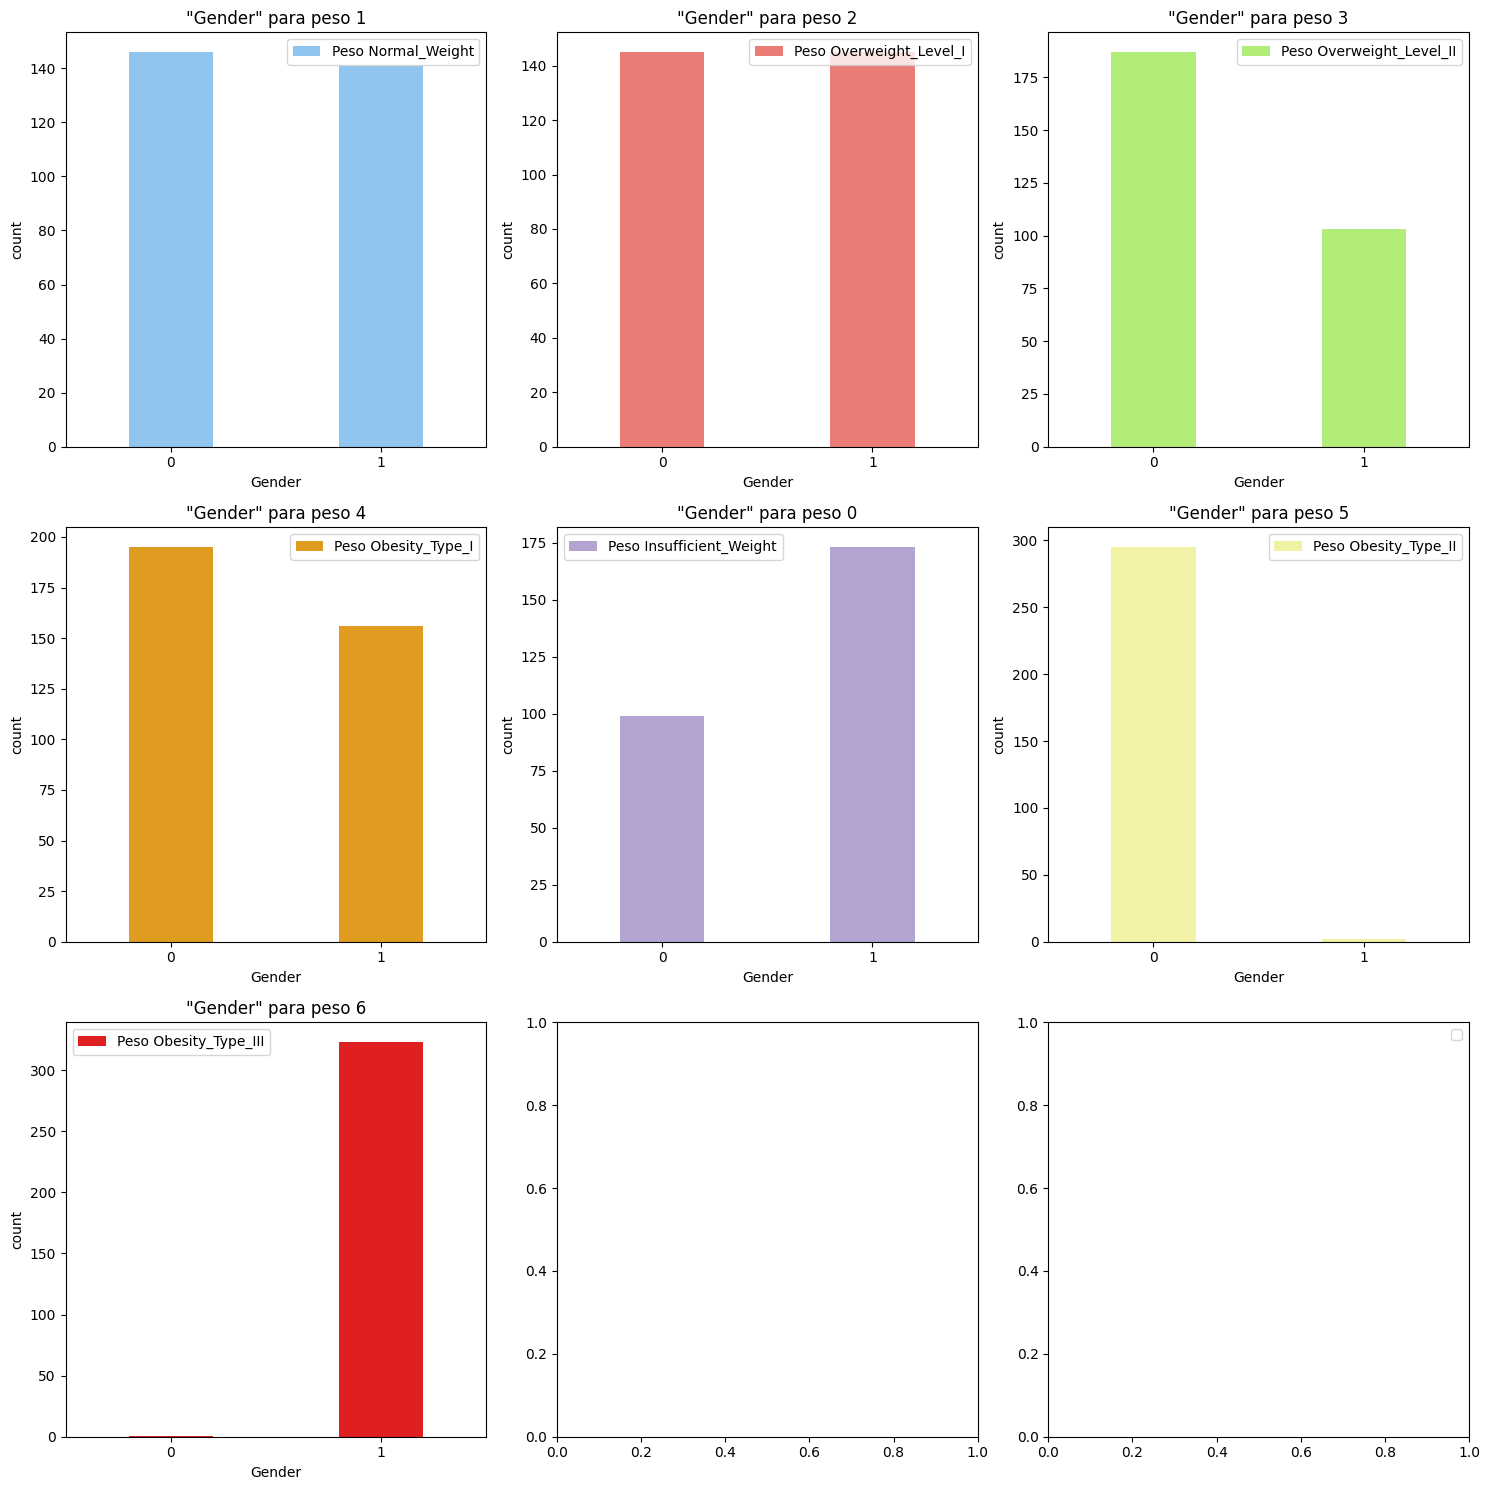

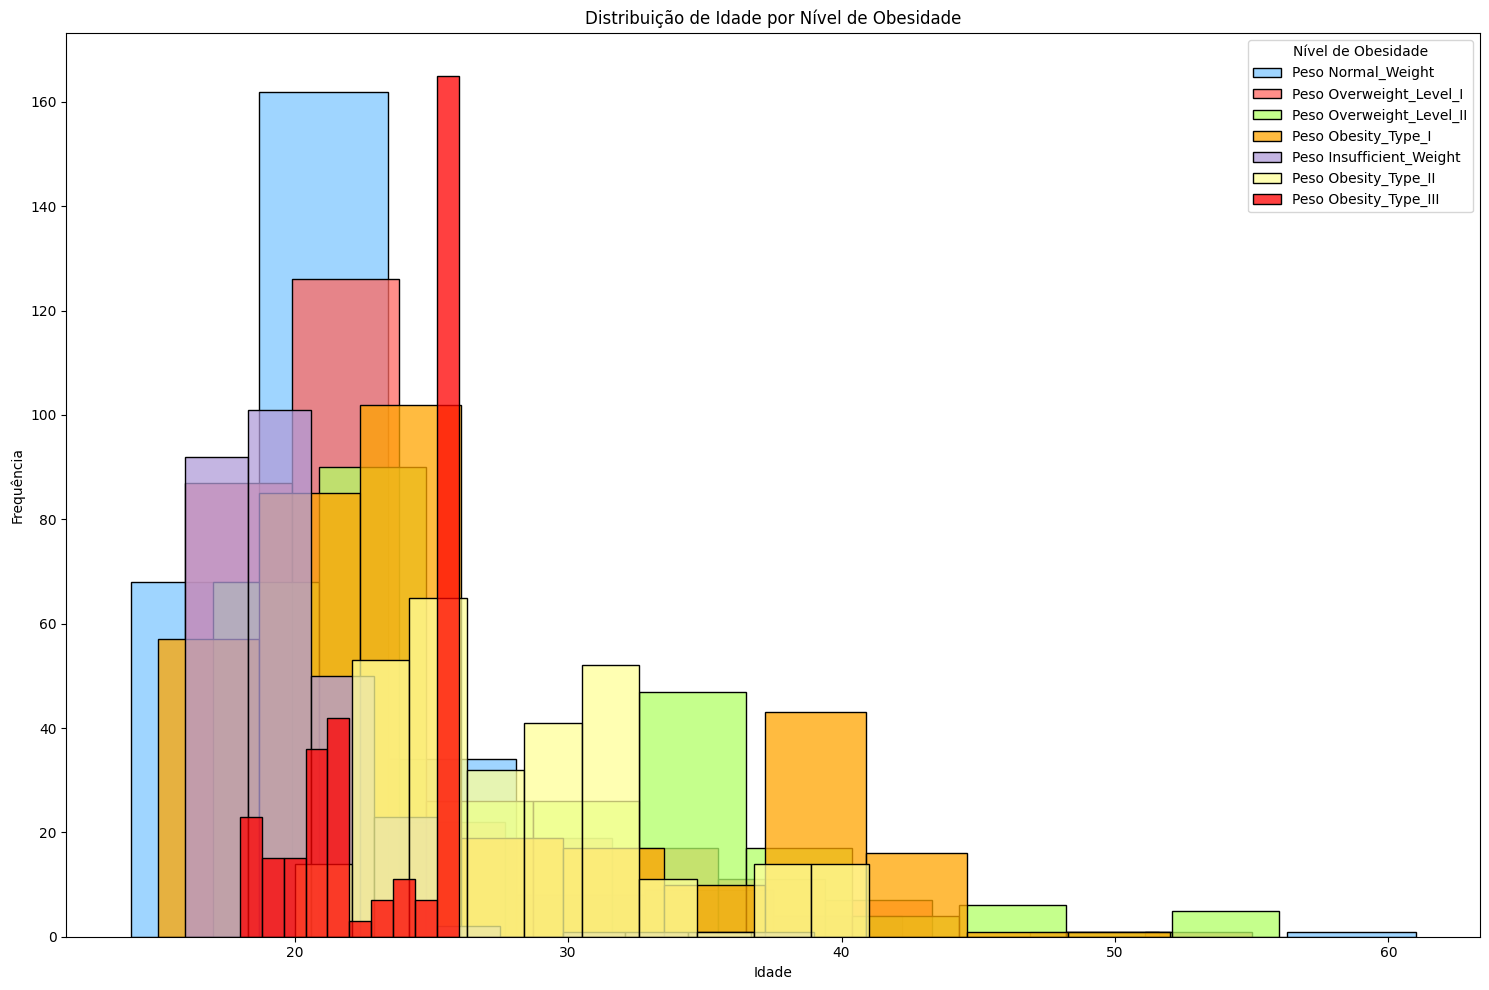

C:\Users\b47133\AppData\Local\Temp\ipykernel_13672\772949071.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


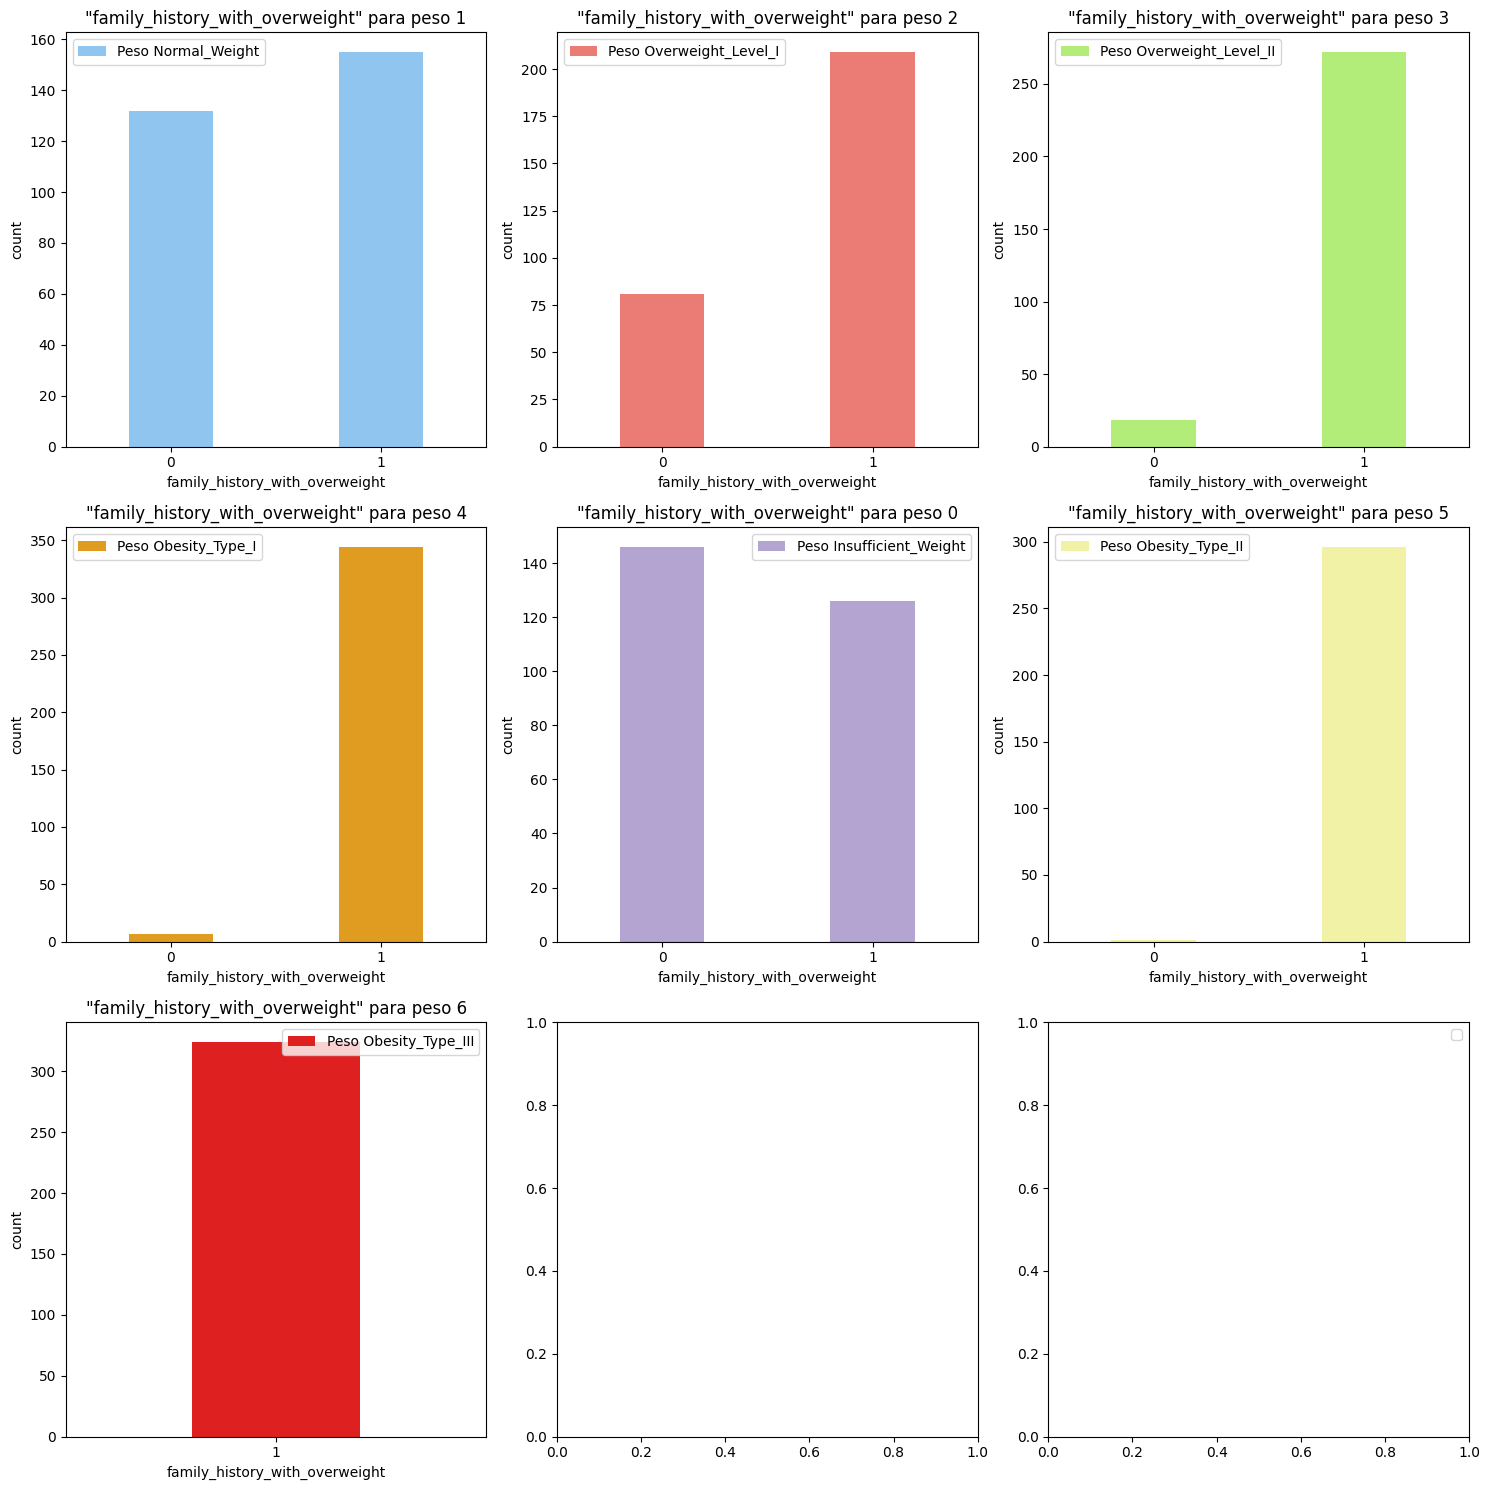

C:\Users\b47133\AppData\Local\Temp\ipykernel_13672\772949071.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


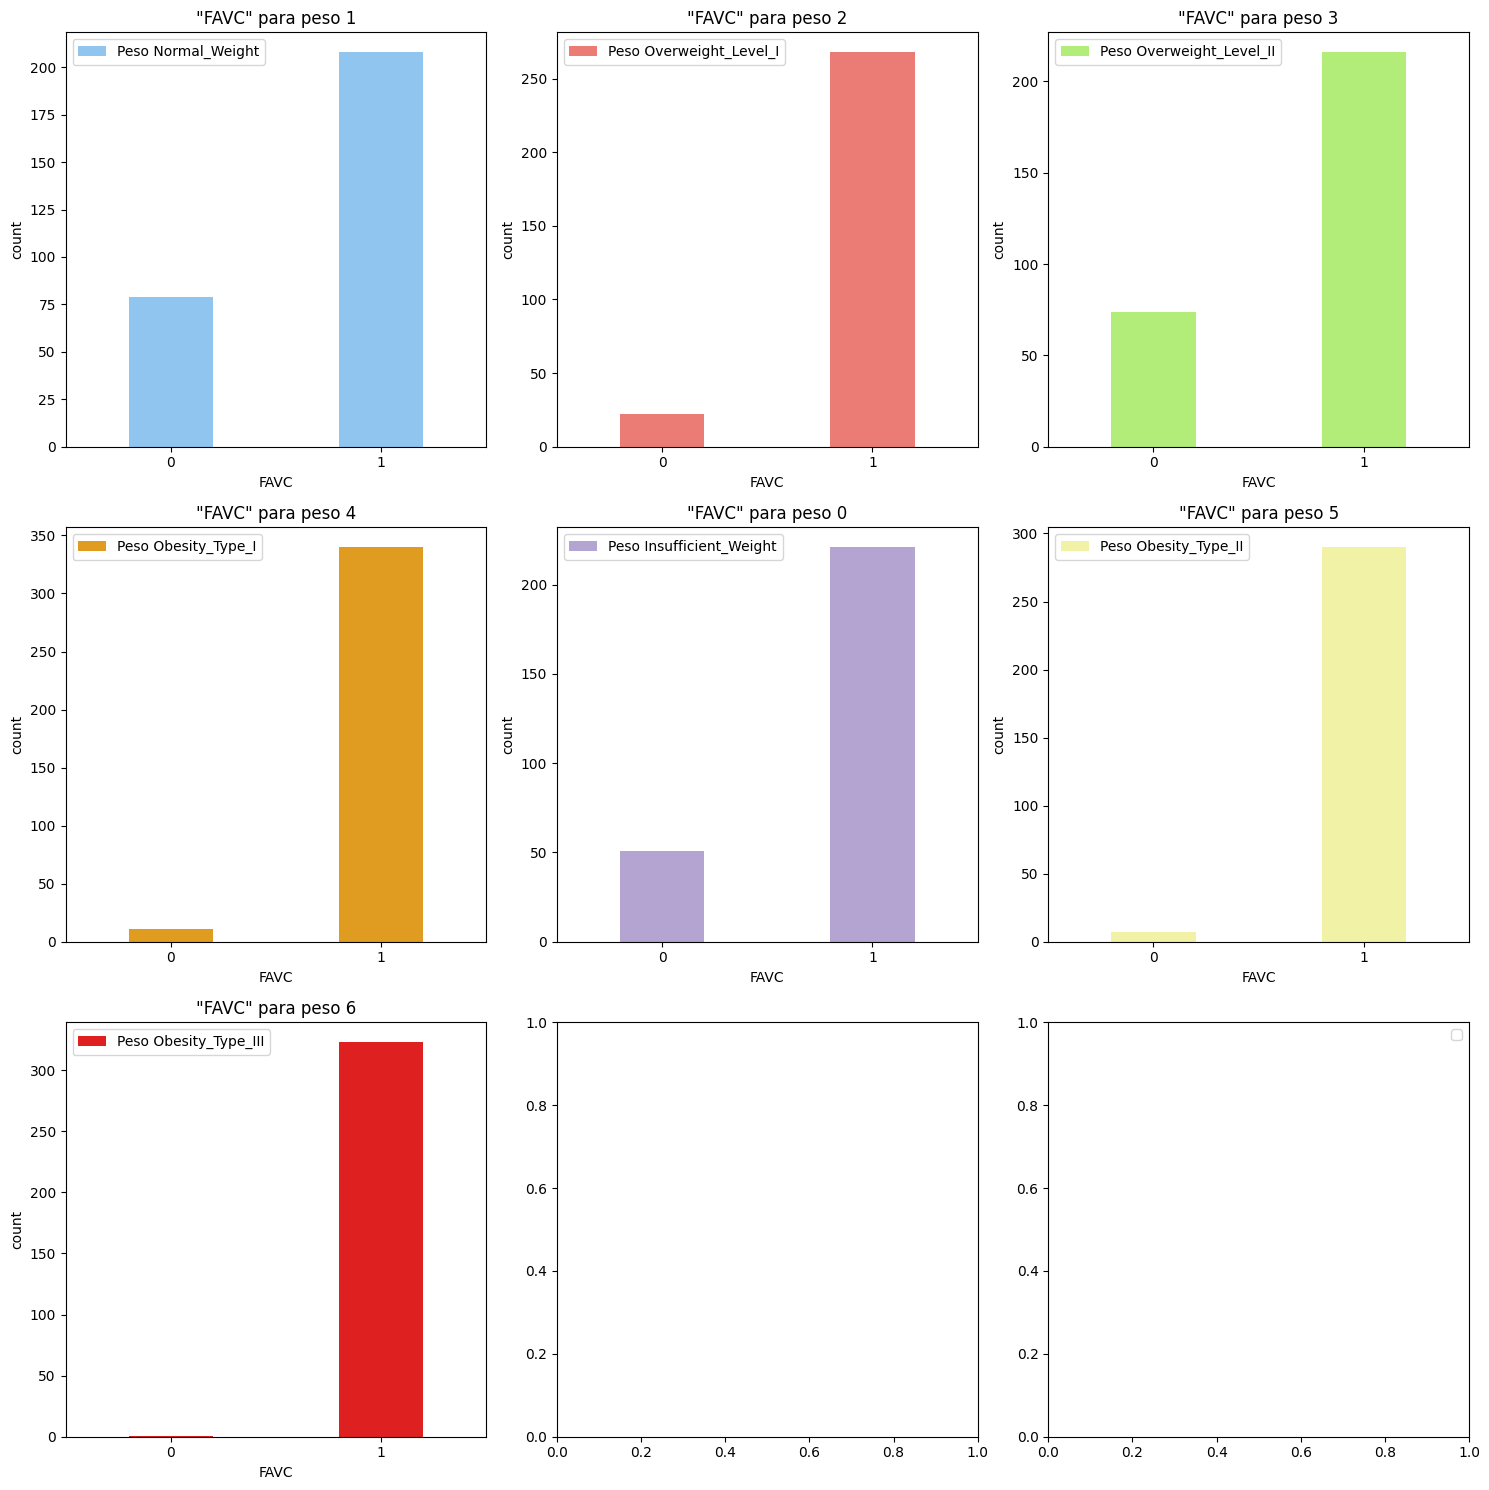

C:\Users\b47133\AppData\Local\Temp\ipykernel_13672\772949071.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


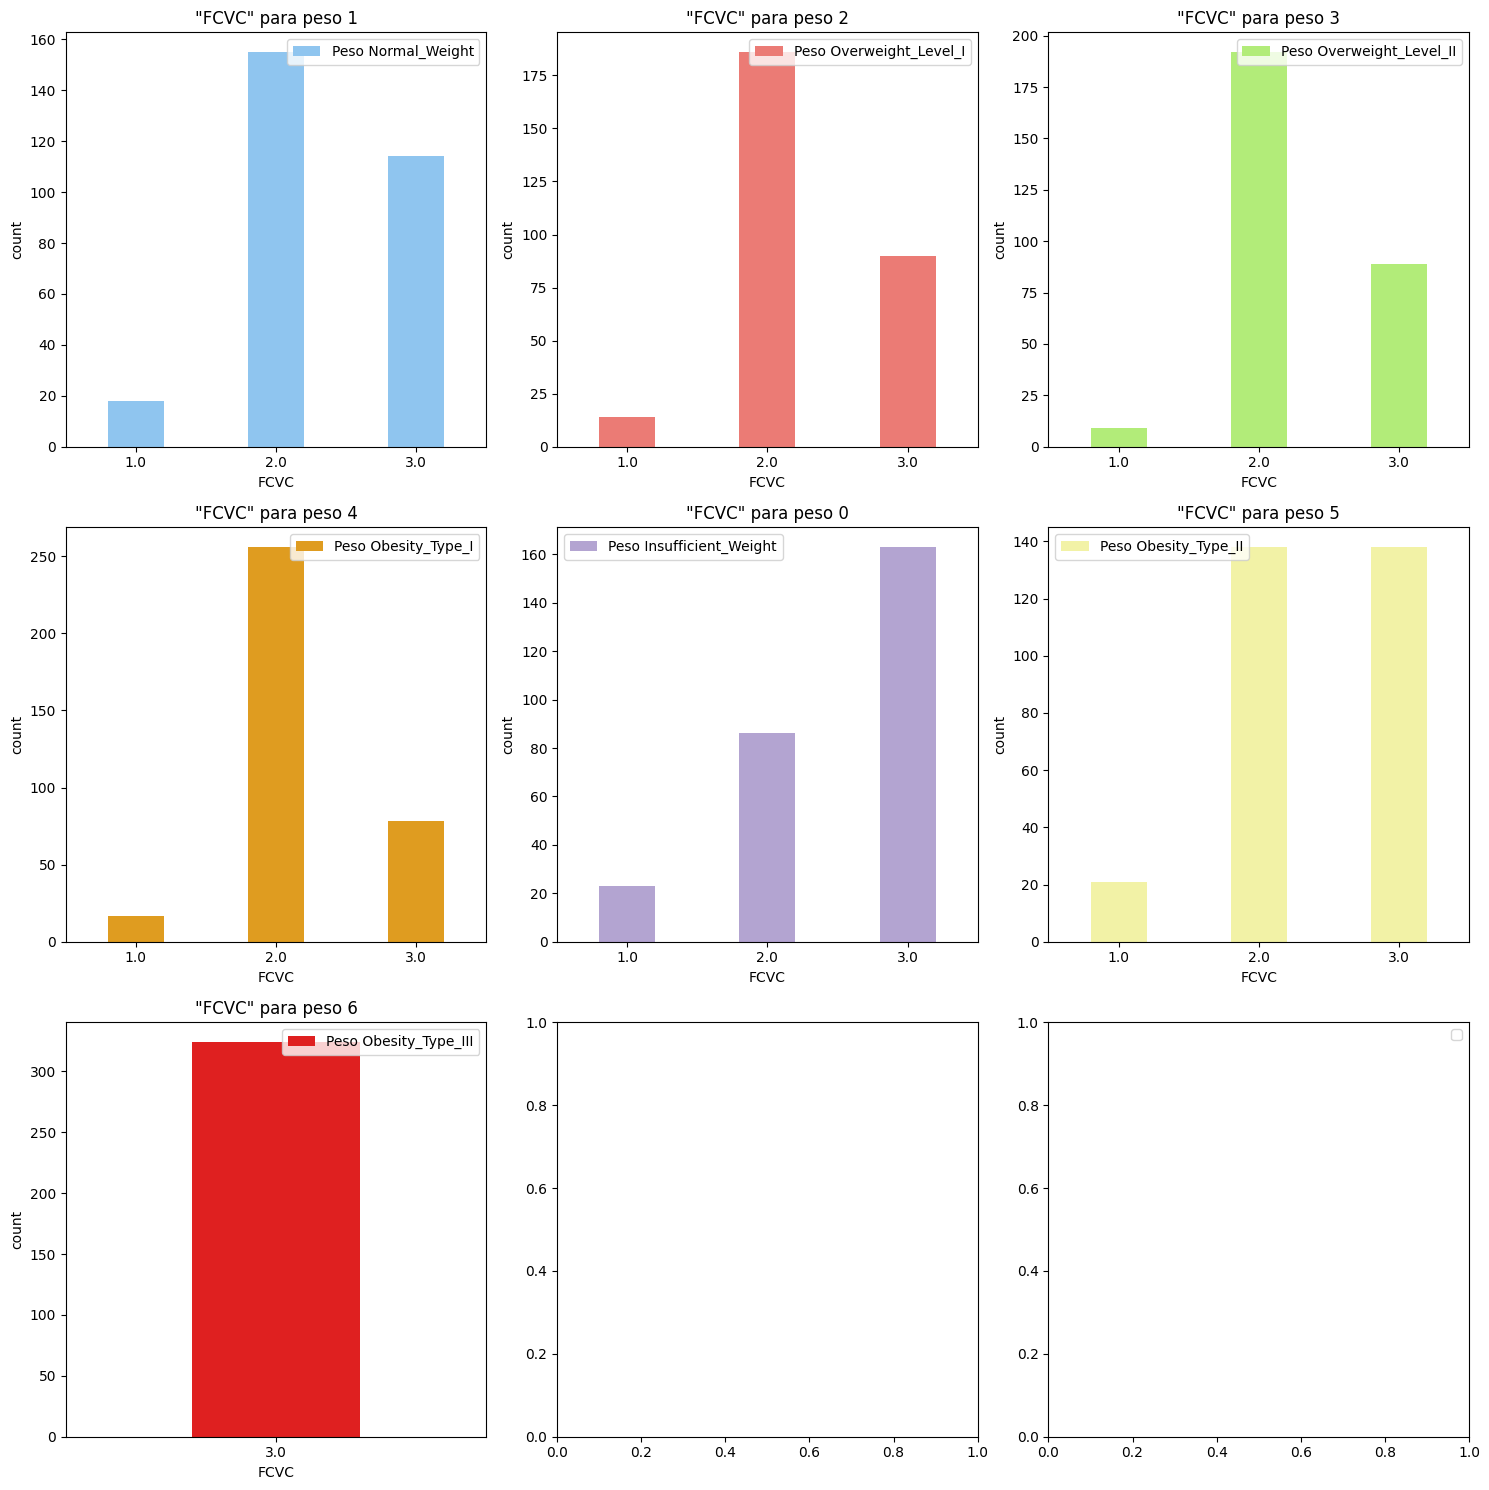

C:\Users\b47133\AppData\Local\Temp\ipykernel_13672\772949071.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


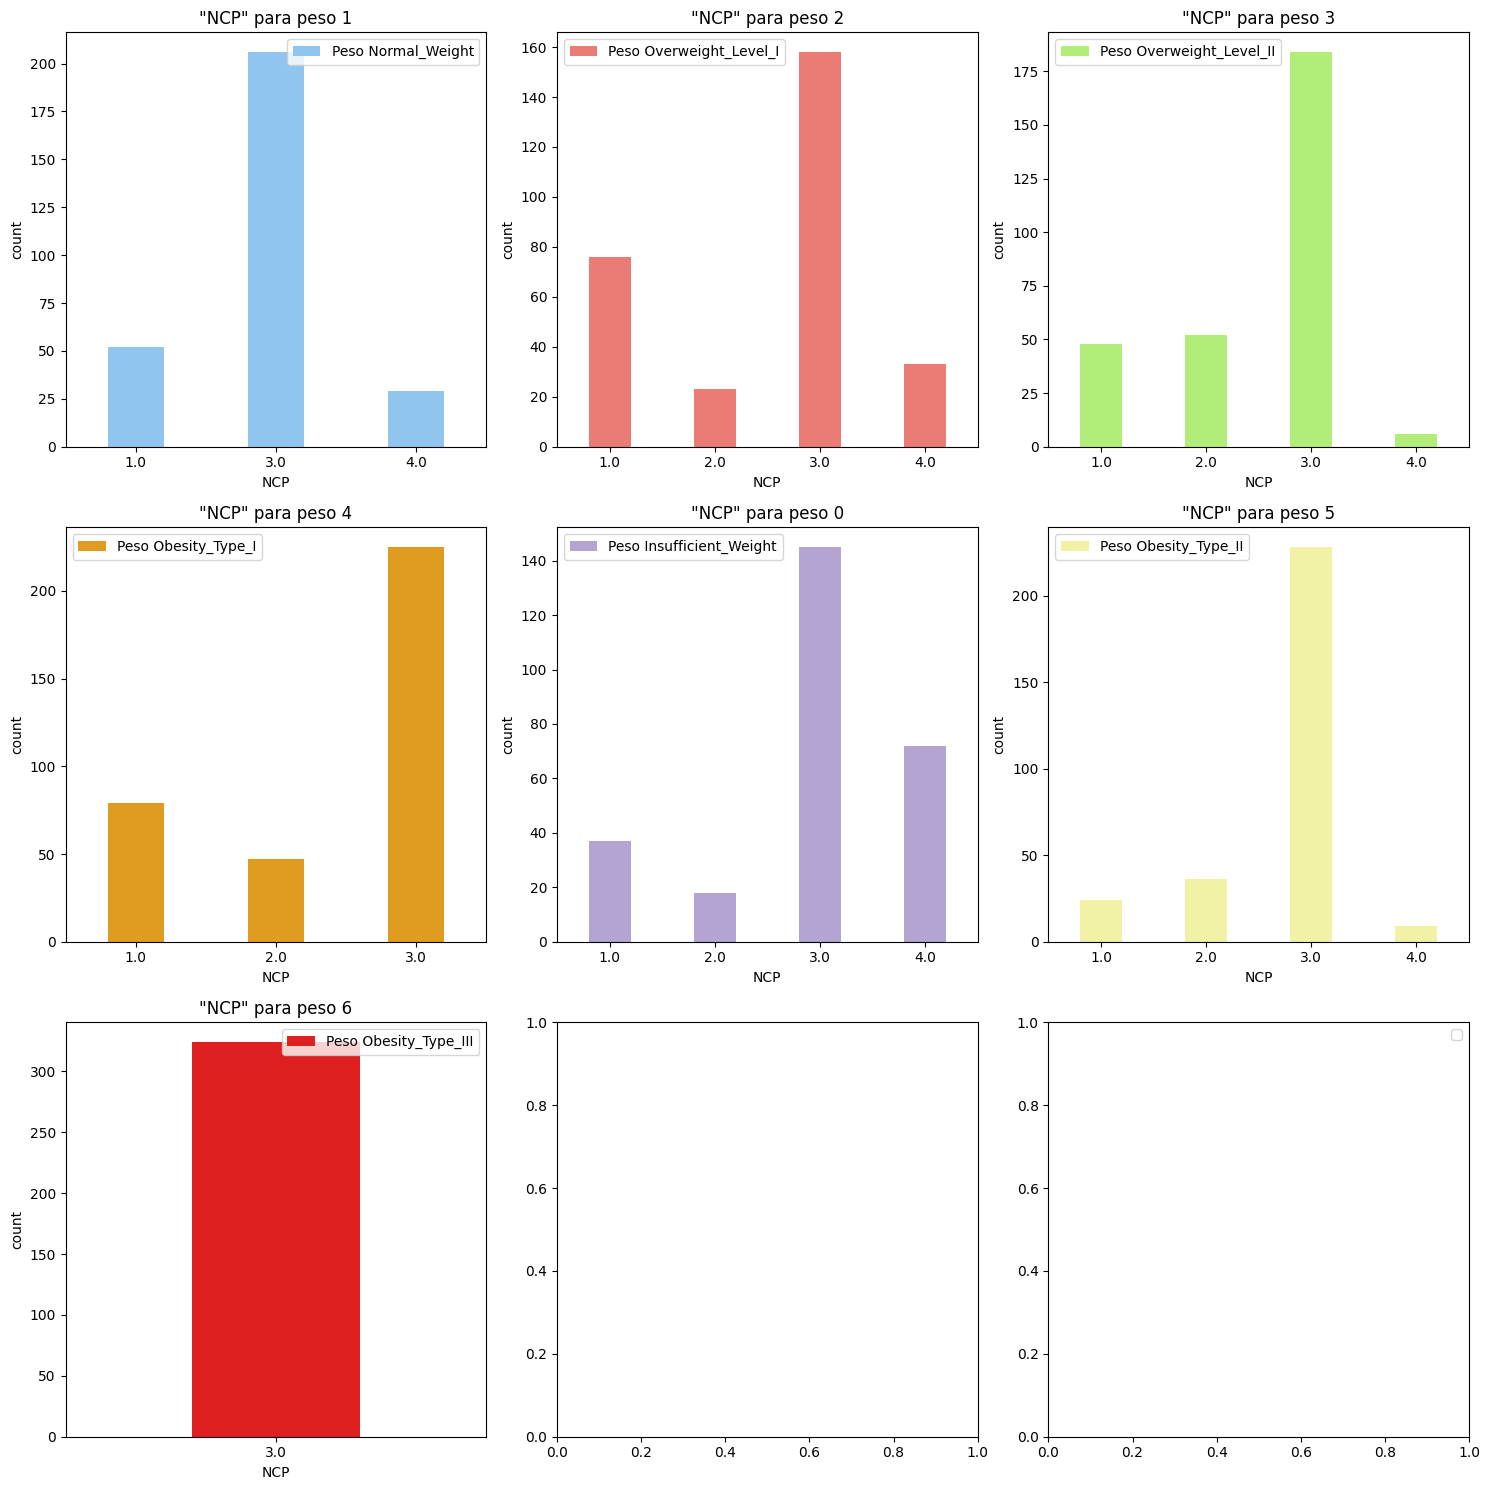

C:\Users\b47133\AppData\Local\Temp\ipykernel_13672\772949071.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


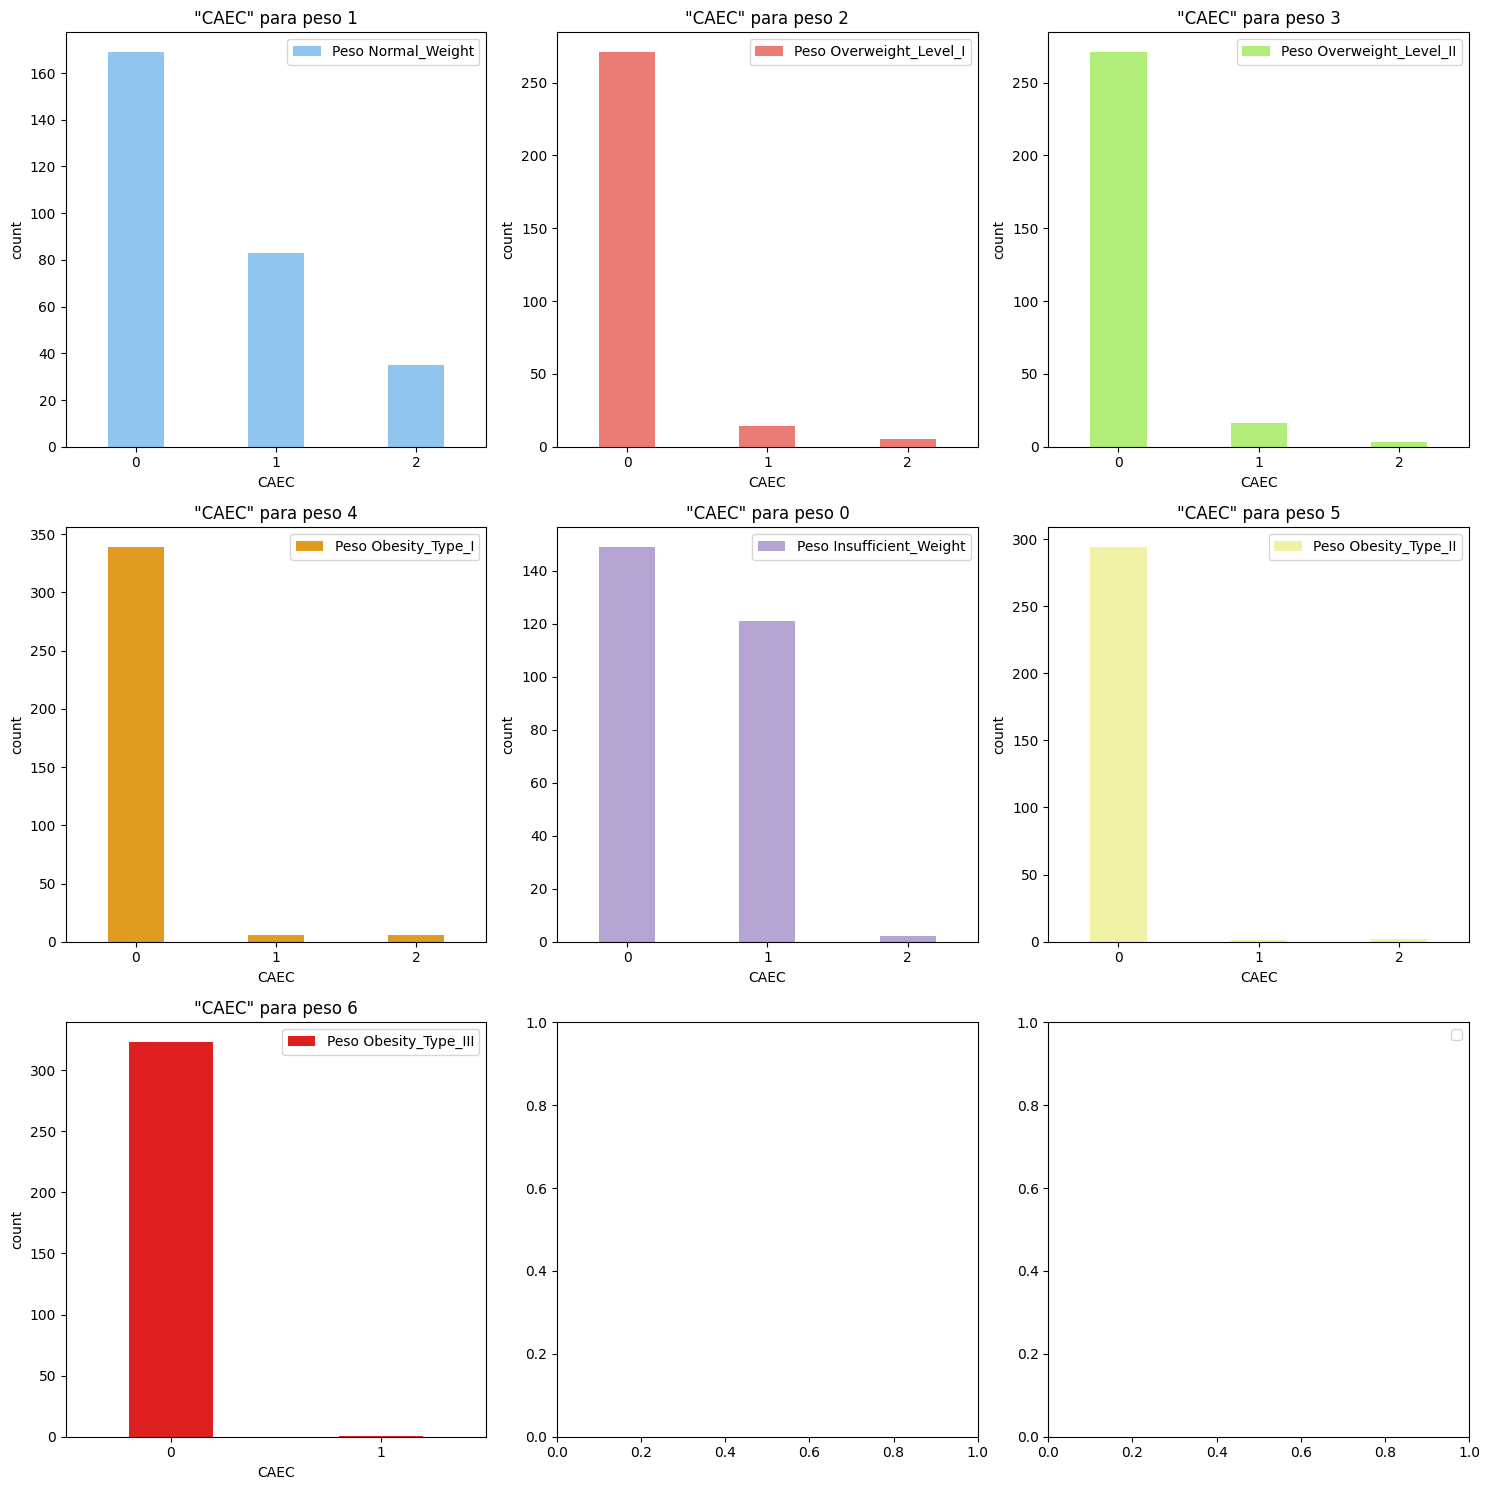

C:\Users\b47133\AppData\Local\Temp\ipykernel_13672\772949071.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


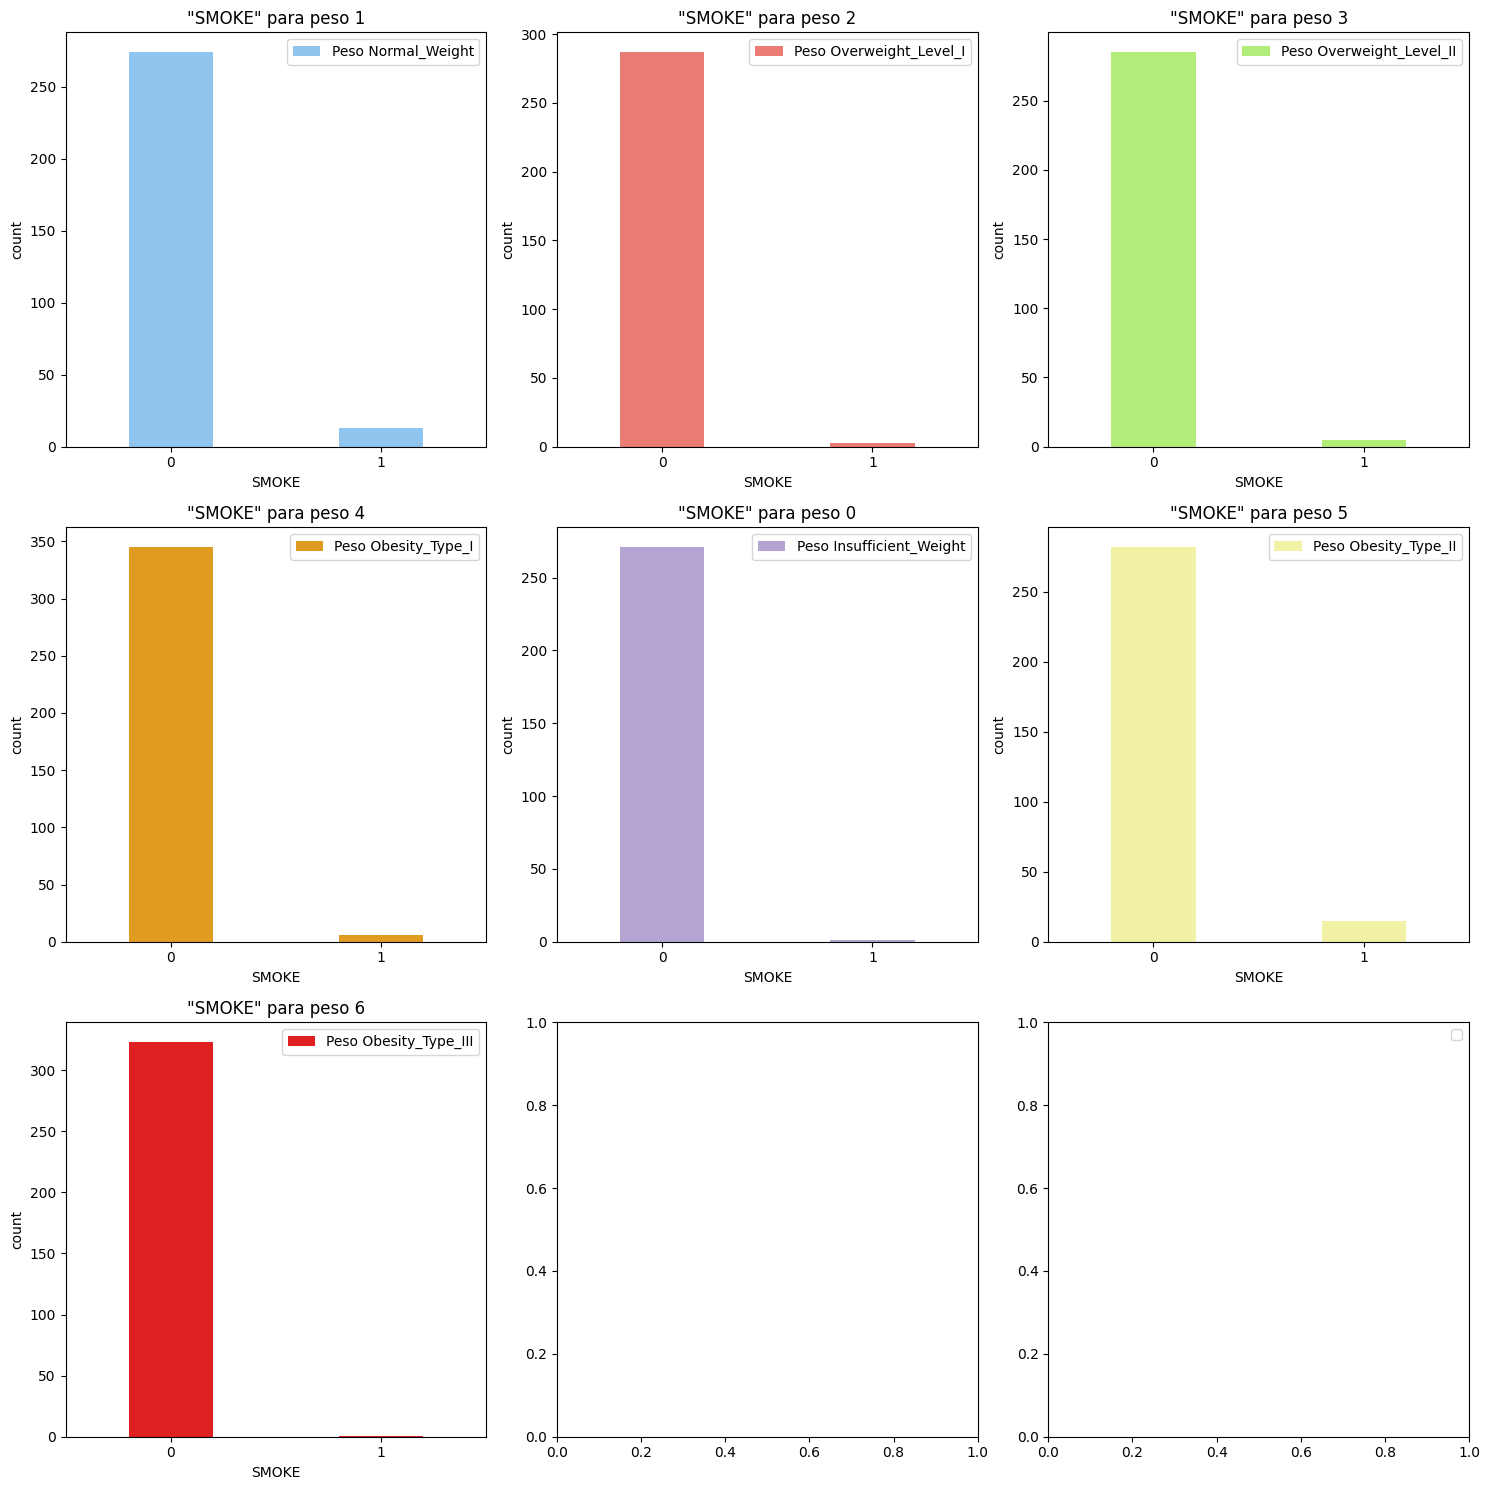

C:\Users\b47133\AppData\Local\Temp\ipykernel_13672\772949071.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


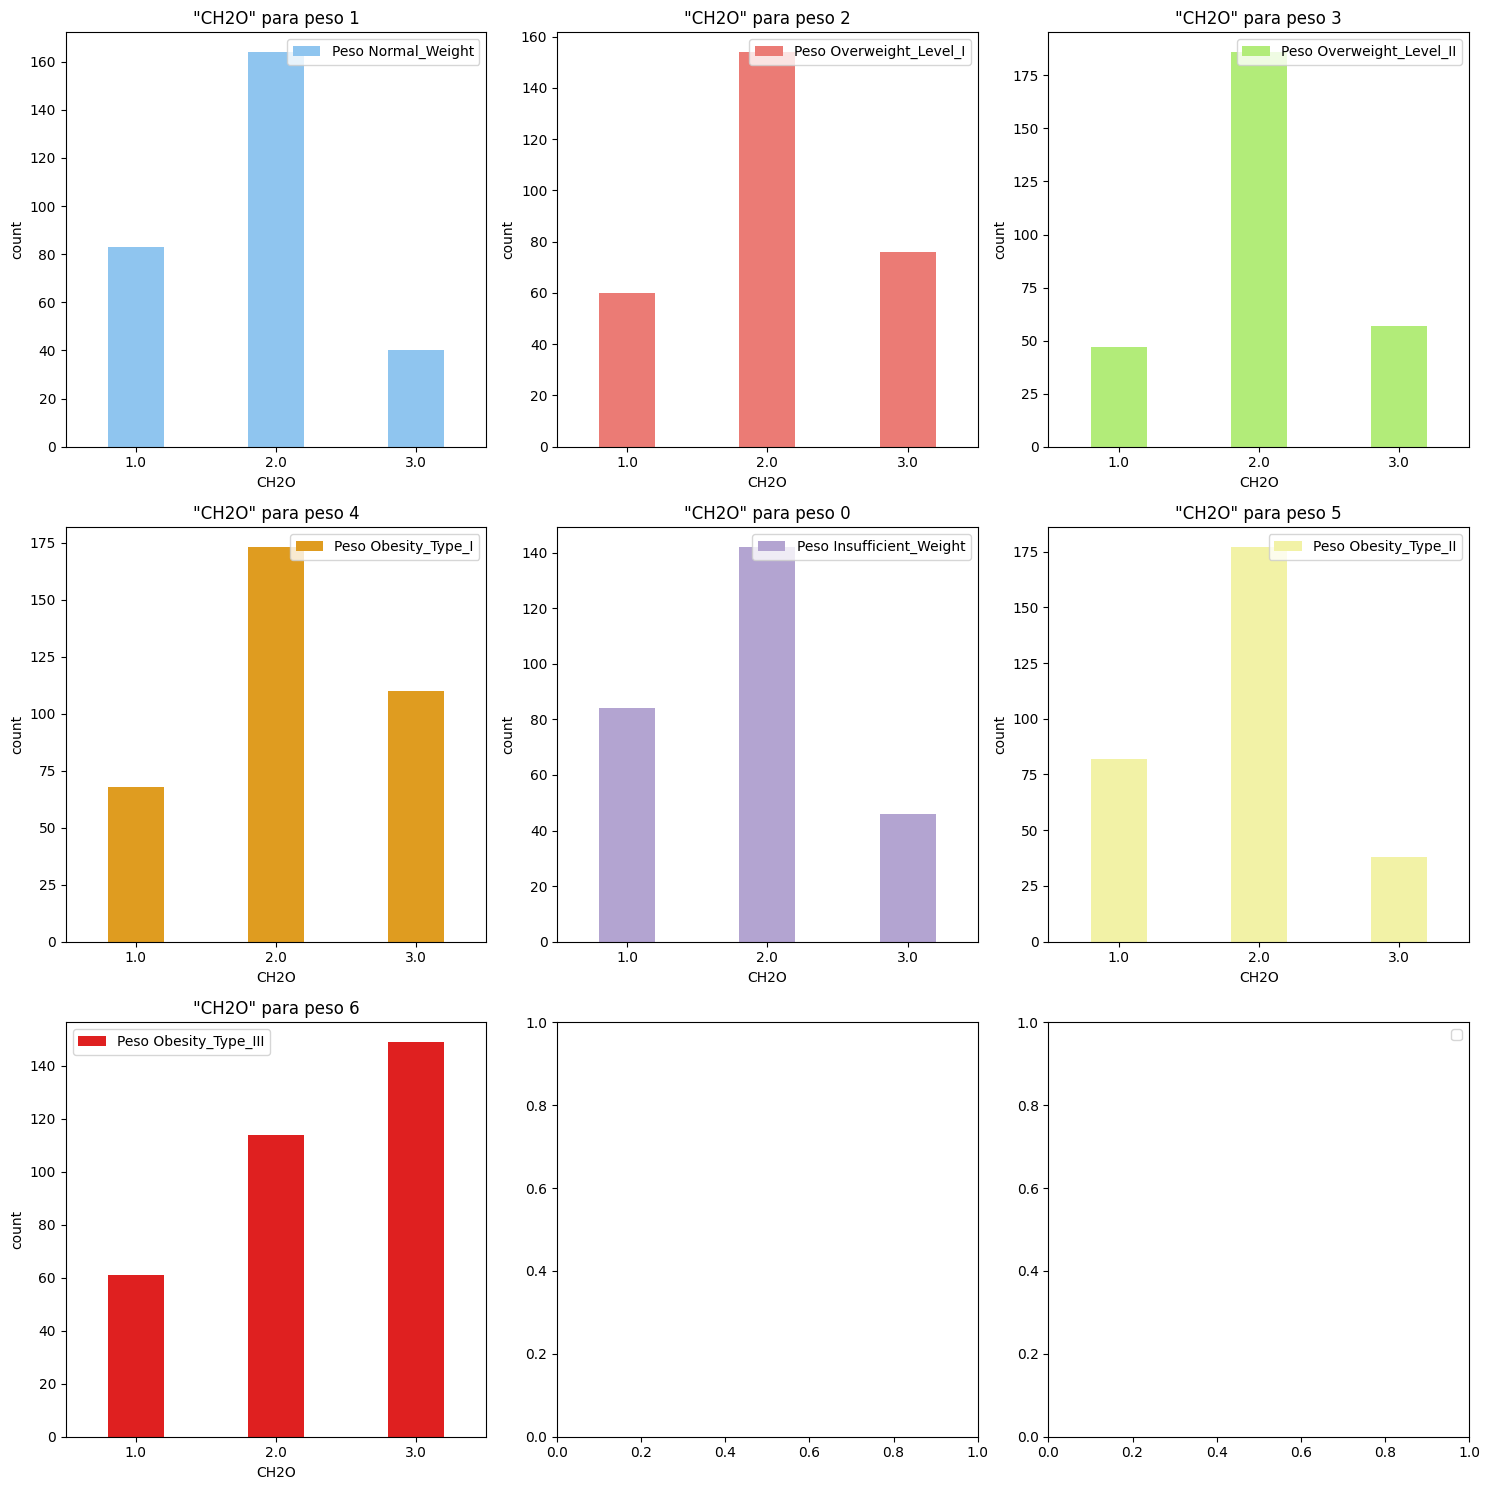

C:\Users\b47133\AppData\Local\Temp\ipykernel_13672\772949071.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


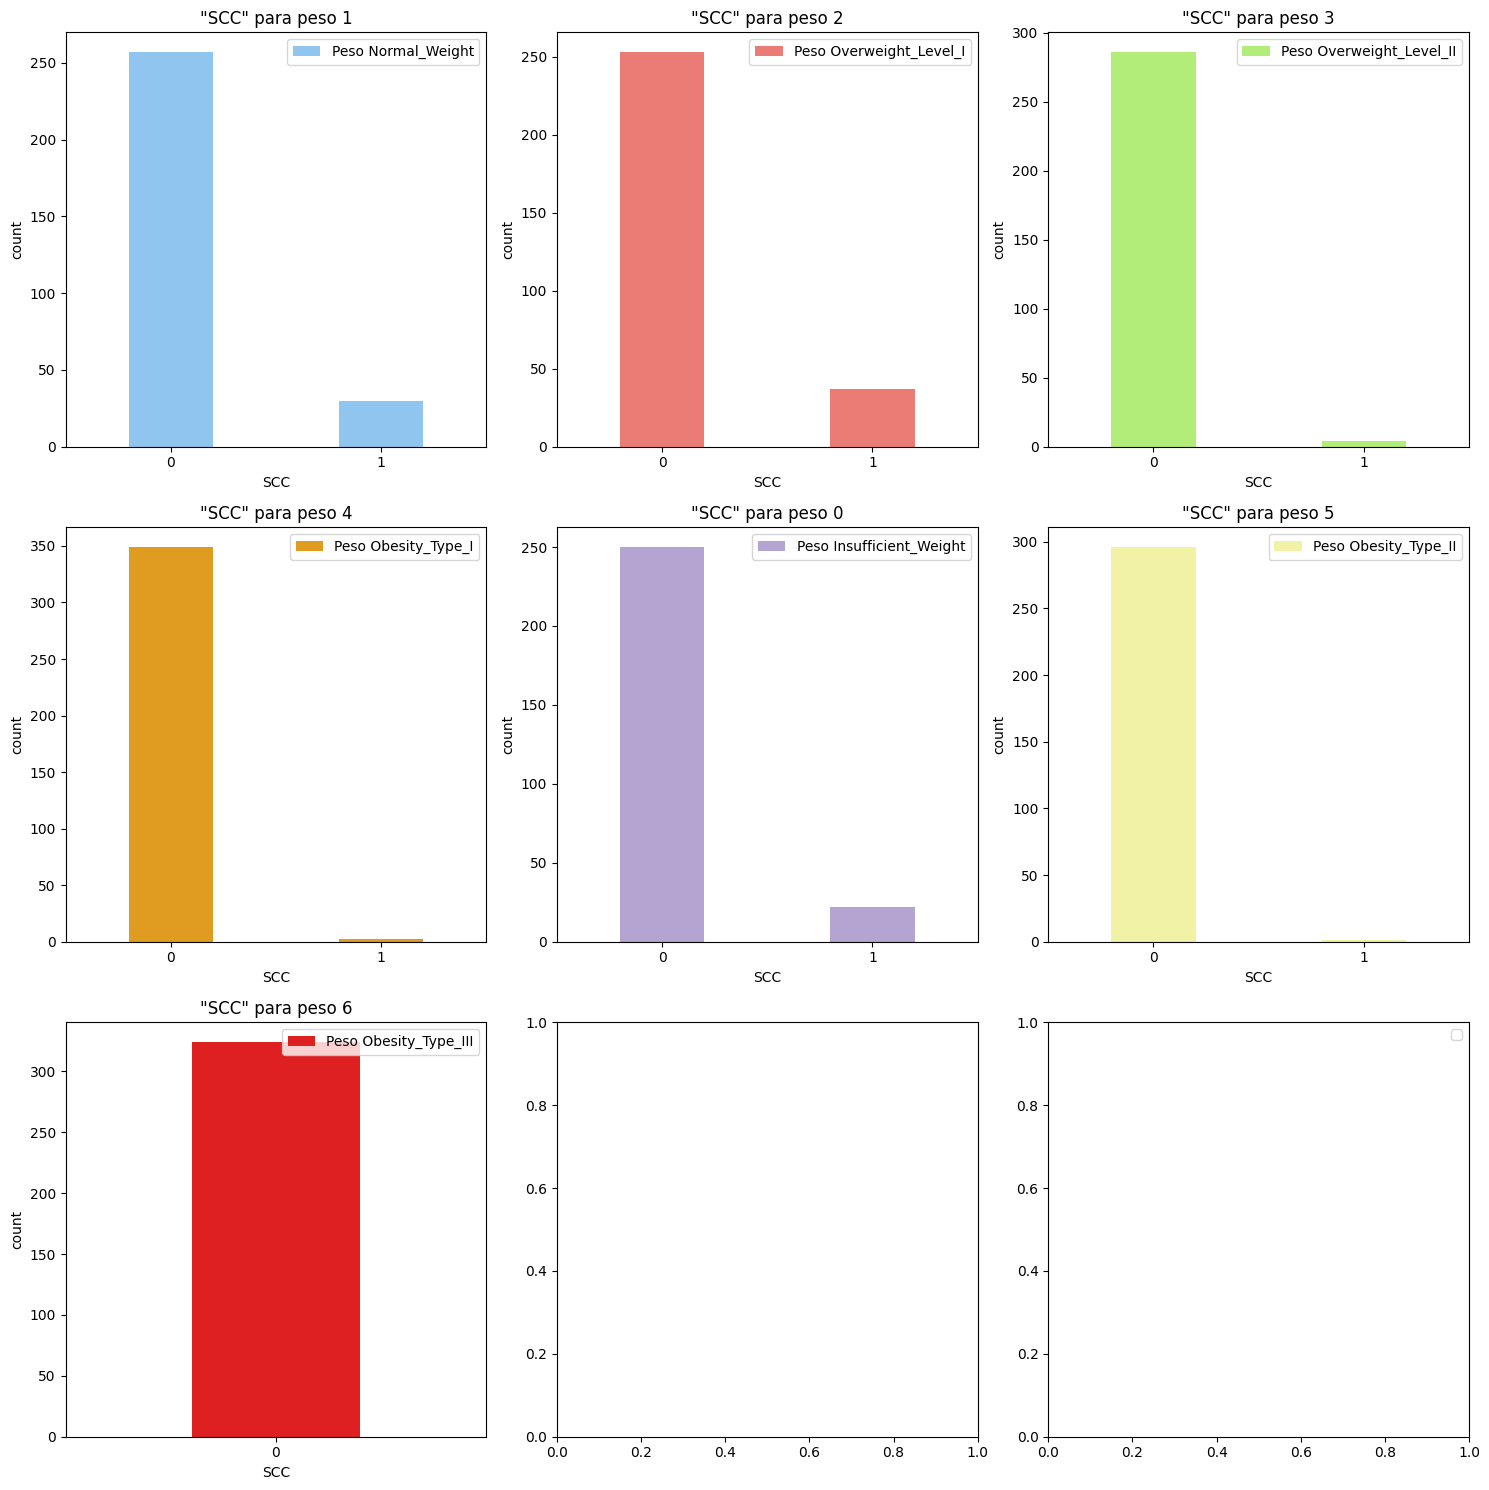

C:\Users\b47133\AppData\Local\Temp\ipykernel_13672\772949071.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


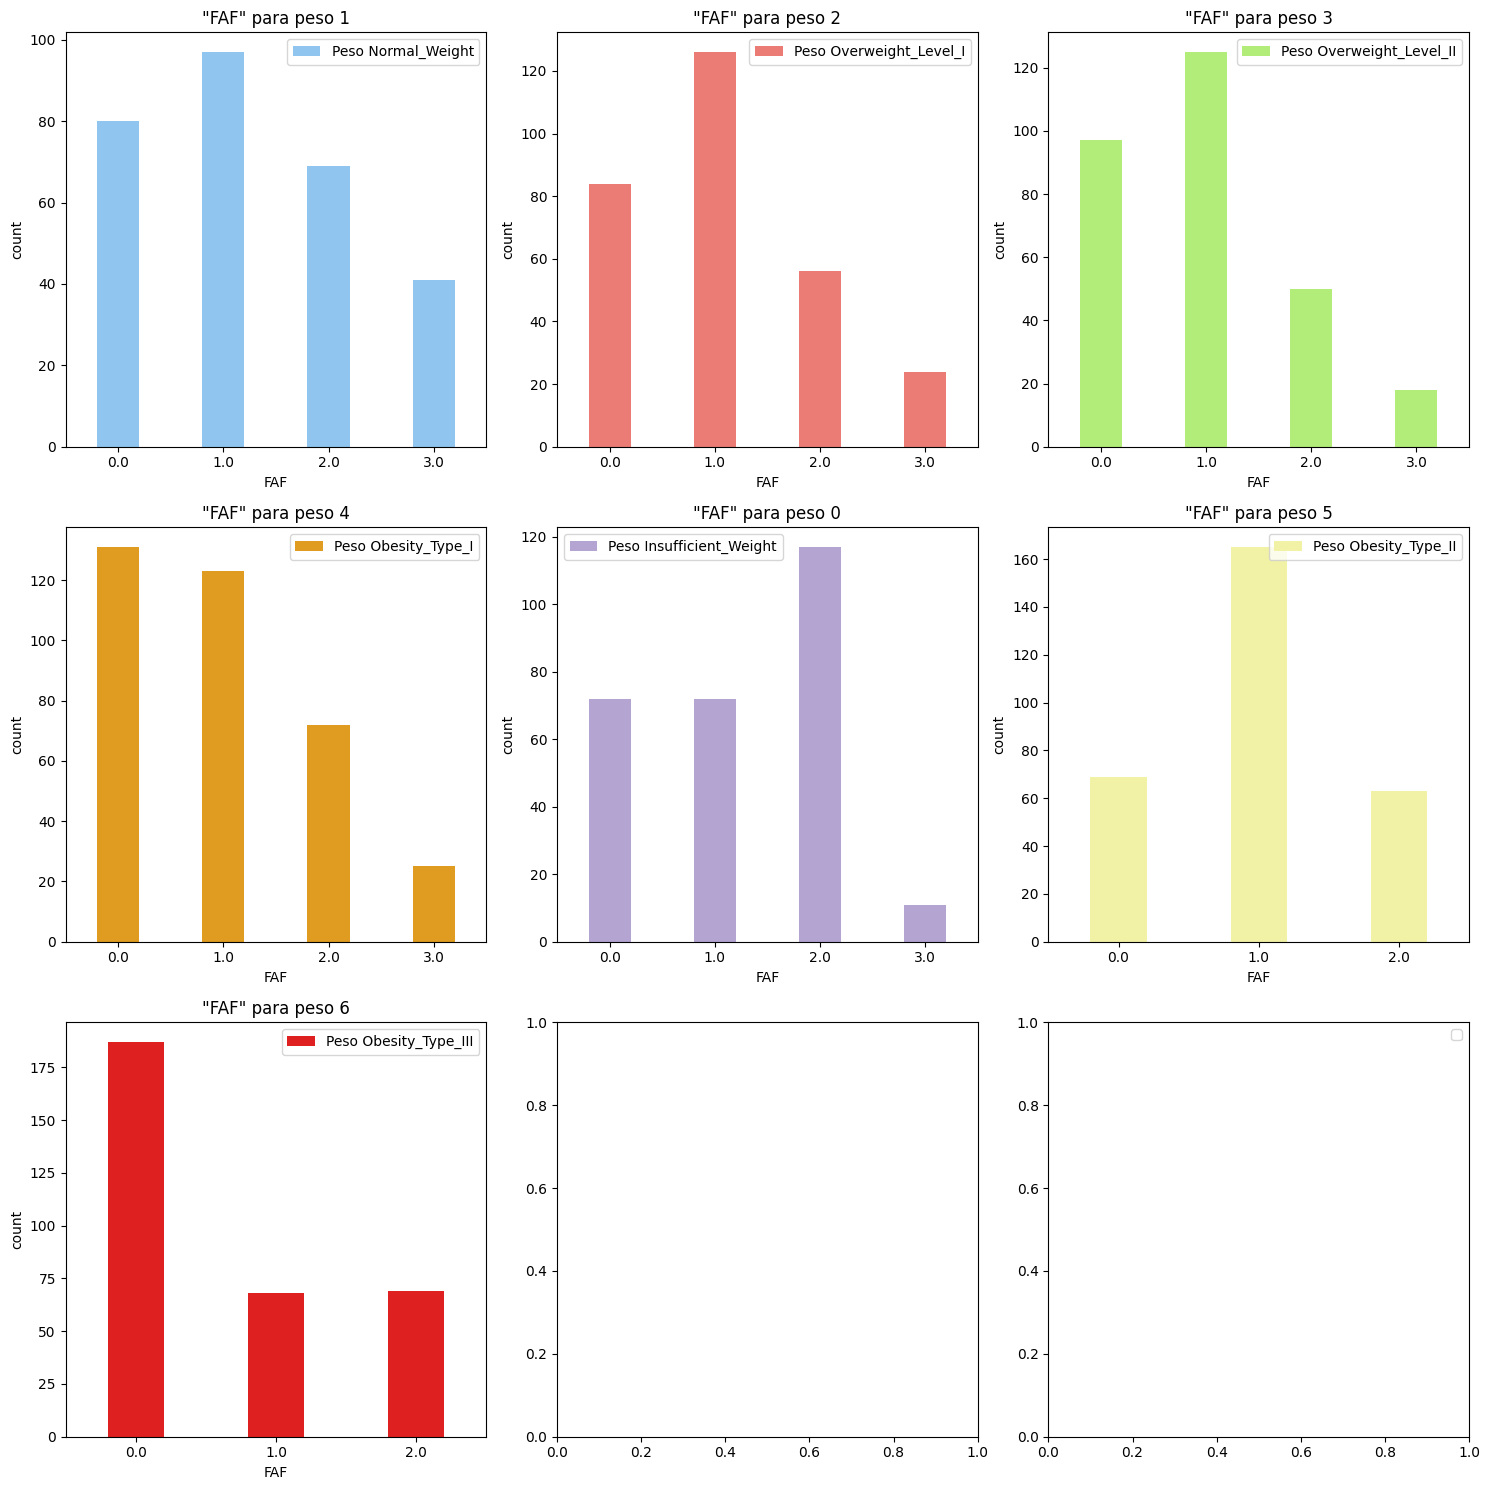

C:\Users\b47133\AppData\Local\Temp\ipykernel_13672\772949071.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


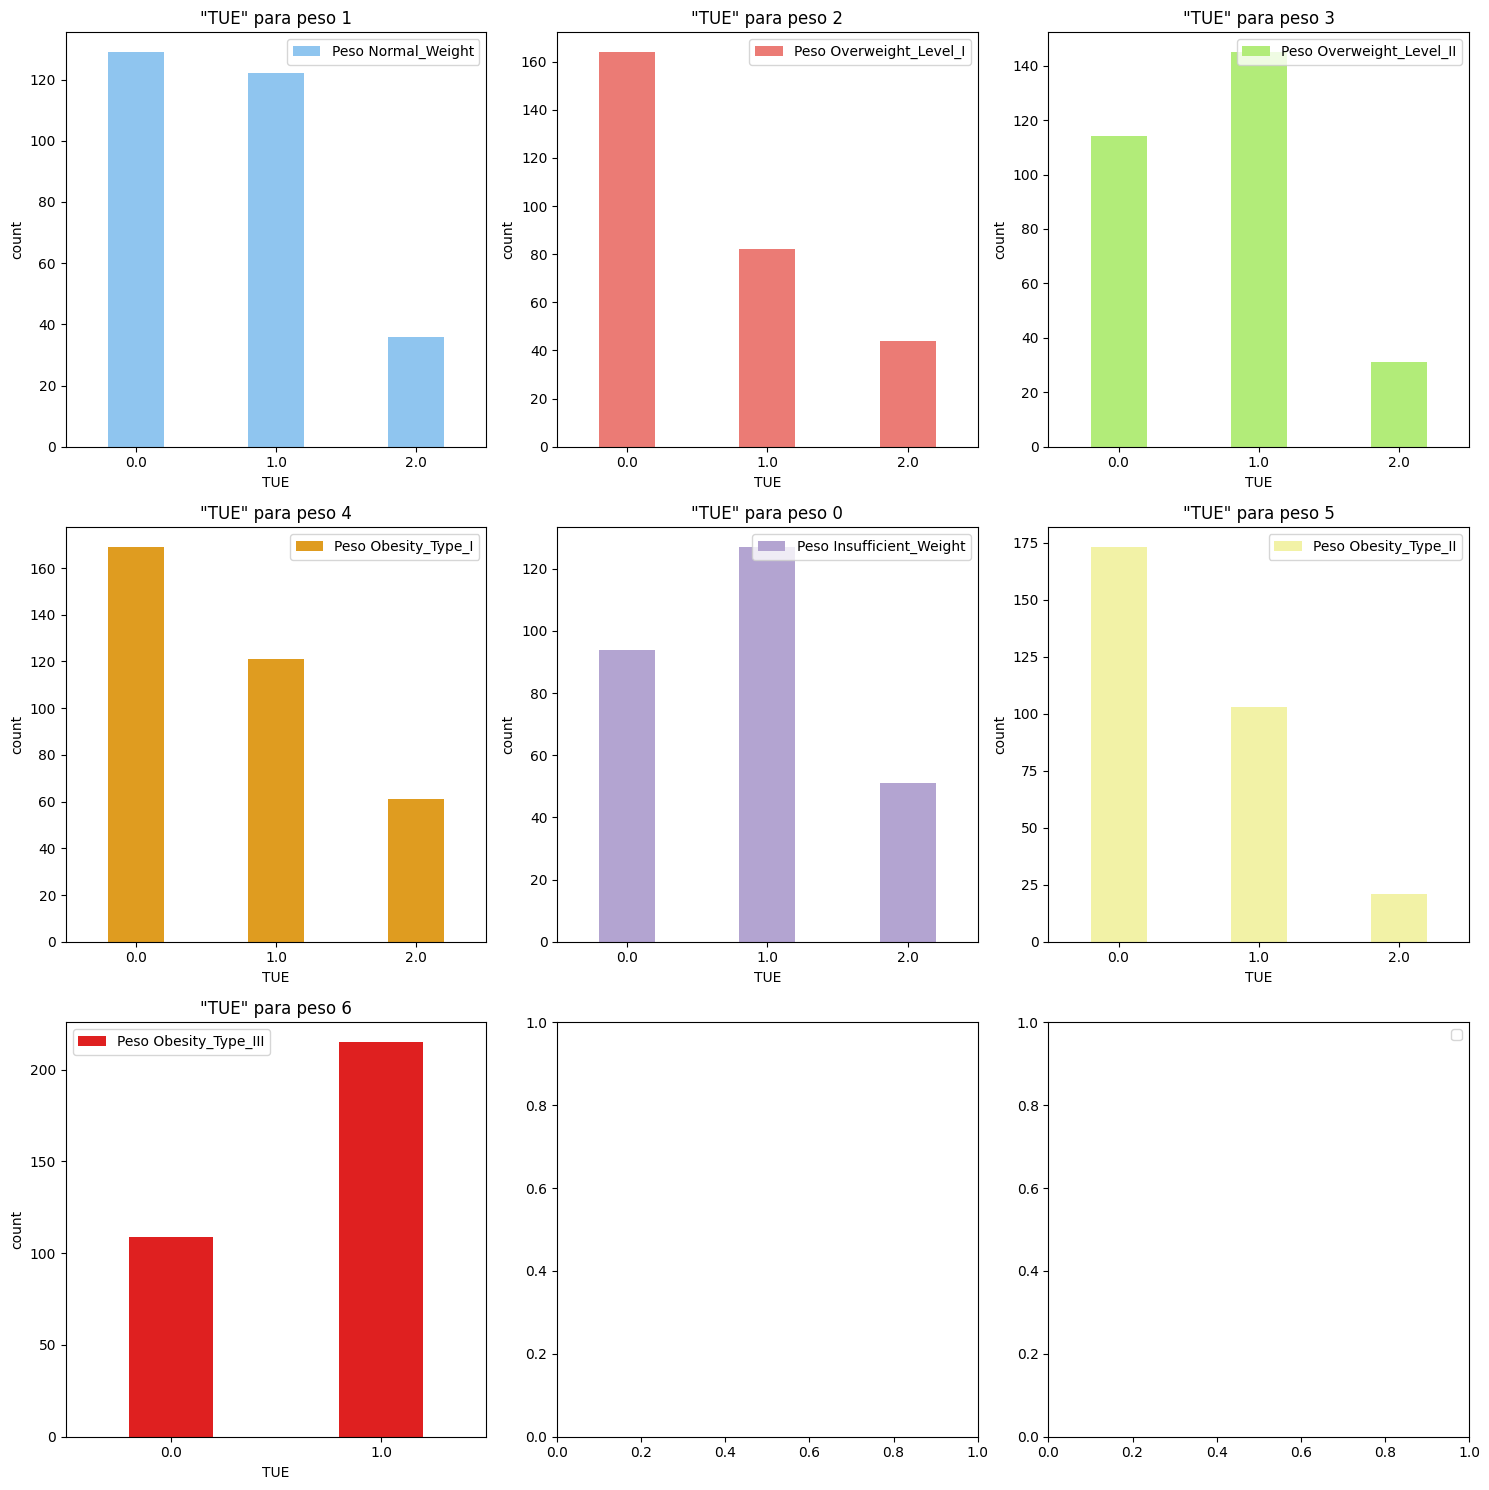

C:\Users\b47133\AppData\Local\Temp\ipykernel_13672\772949071.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


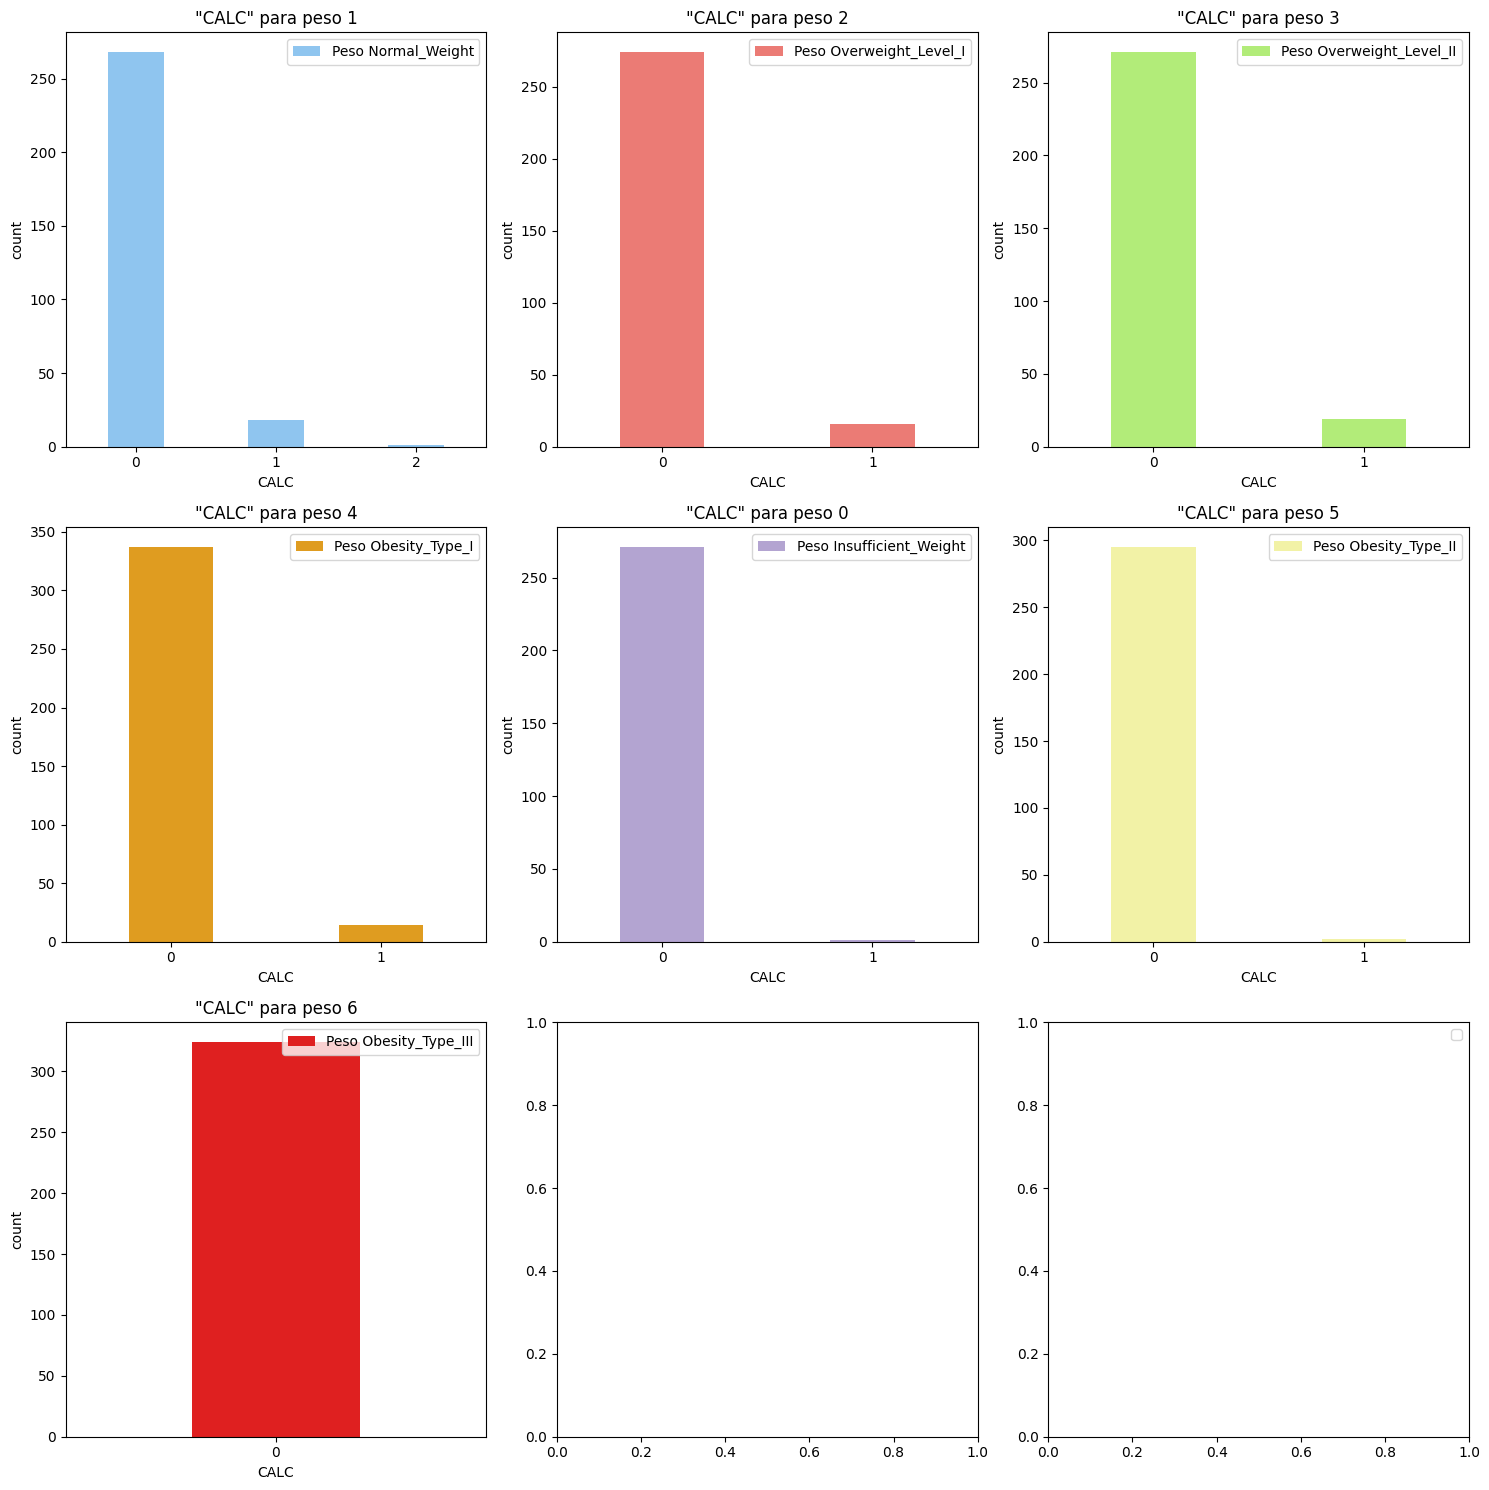

C:\Users\b47133\AppData\Local\Temp\ipykernel_13672\772949071.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


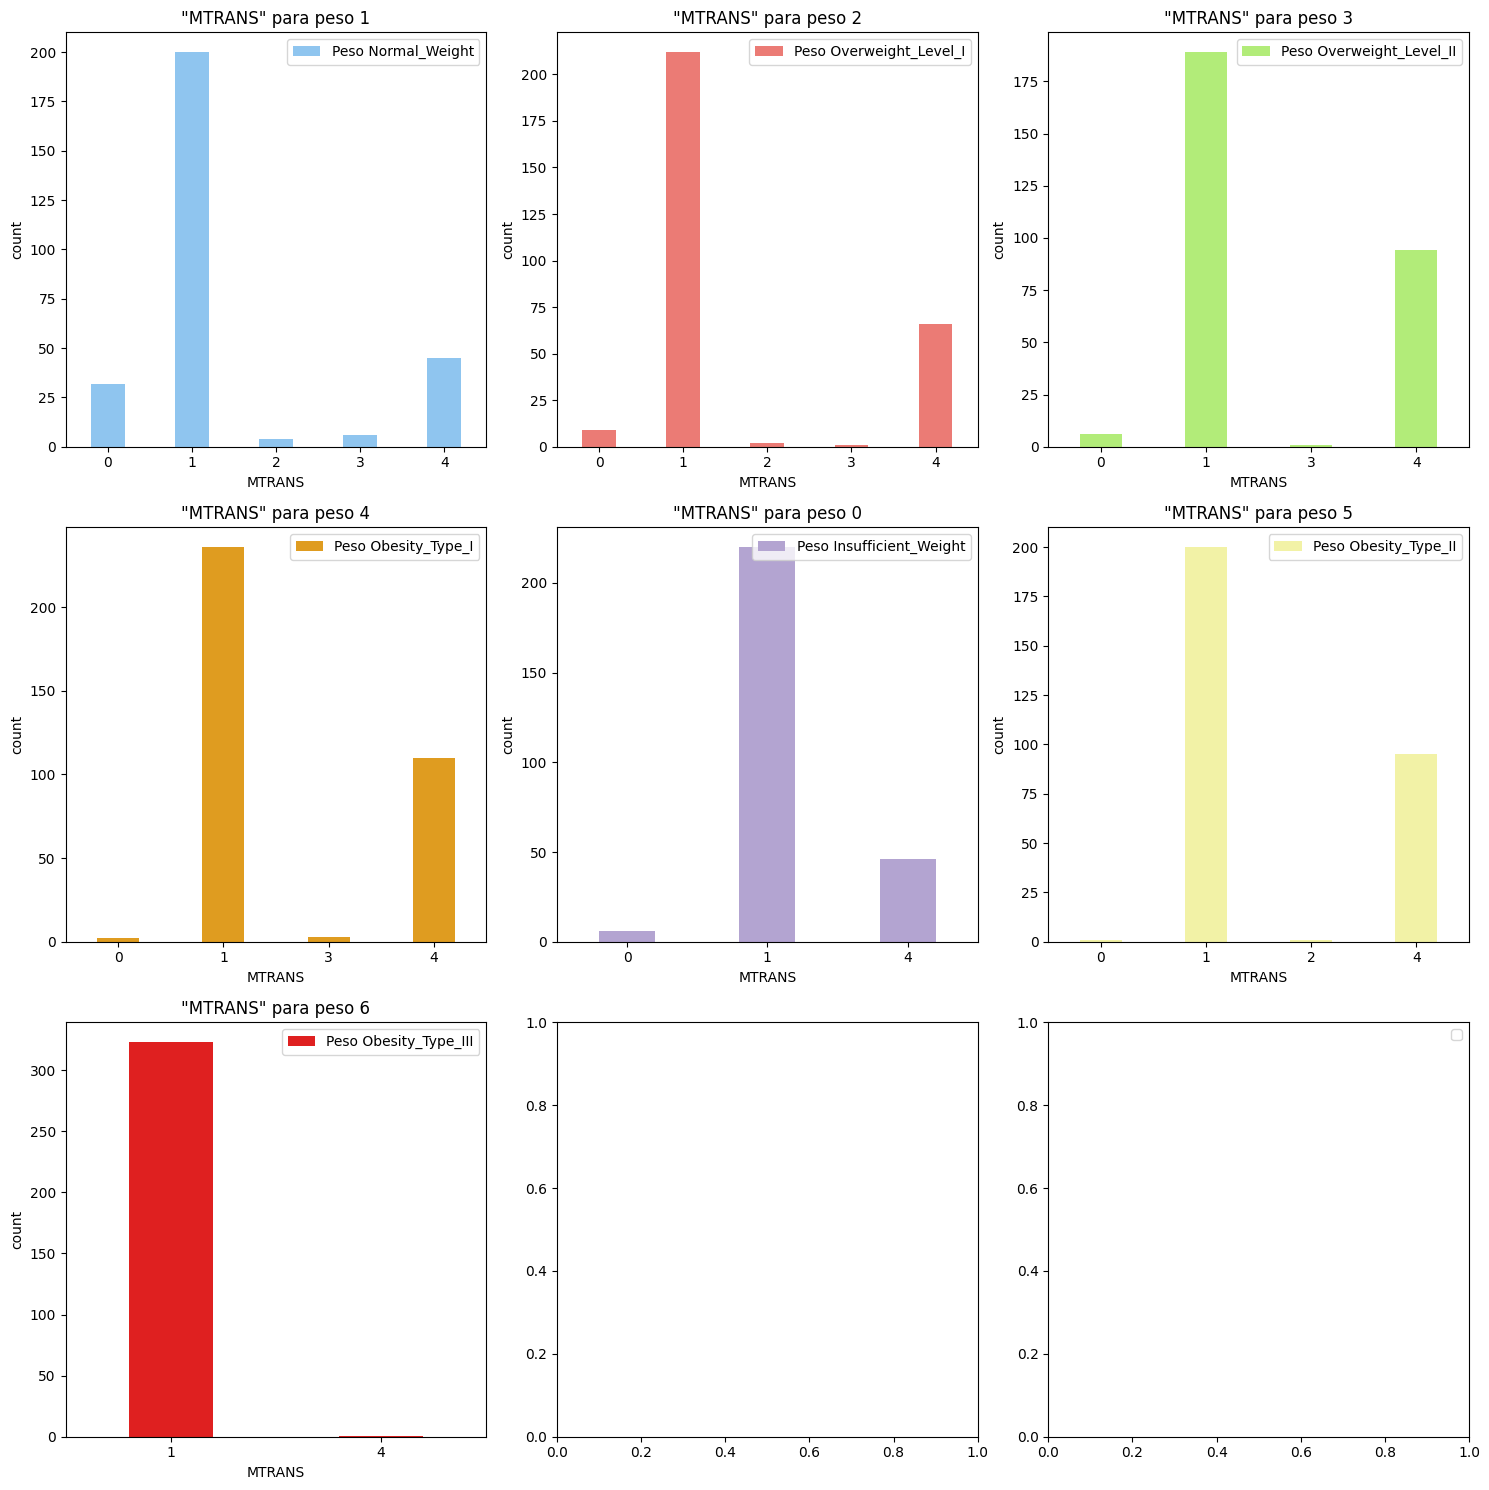

In [11]:
list_columns = data.columns
list_columns = list_columns[:-1]

for c in list_columns:
    if c == "Age": 
        # Plotar a frequência de idade agrupada por nível de obesidade
        plt.figure(figsize=(15, 10))
        for i, categoria in enumerate(weight_levels):
            min_data = data[data["NObeyesdad"] == categoria]
            sns.histplot(min_data['Age'], color=colors[i], label=f'Peso {obesity_labels[i]}', kde=False, bins=10)
        
        plt.title('Distribuição de Idade por Nível de Obesidade')
        plt.xlabel('Idade')
        plt.ylabel('Frequência')
        plt.legend(title='Nível de Obesidade')
        plt.tight_layout()
        plt.savefig(f"./plots/plt_{c}_frequencia.png")
        plt.show()
                
    else:
        fig, axs = plt.subplots(3, 3, figsize=(15, 15))
            
        for i, ax in enumerate(axs.flat):
            if i < len(weight_levels):
                categoria = weight_levels[i]
                min_data = data[data["NObeyesdad"] == categoria]
                sns.countplot(data=min_data, x=c, color=colors[i], ax=ax, label=f'Peso {obesity_labels[i]}')
                ax.set_title(f'"{c}" para peso {categoria}')
                # Diminuir a largura das barras
                for bar in ax.patches:
                    x = bar.get_x()
                    width = bar.get_width()
                    bar.set_width(width * 0.5)  # Ajuste este valor conforme necessário
                    bar.set_x(x + width * 0.25)  # Ajustar a posição para centralizar
        
        # handles = [mpatches.Patch(color=colors[i], )]
        # fig.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"./plots/plt_{c}_frequencia.png")
        plt.show()
    

C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)
C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)


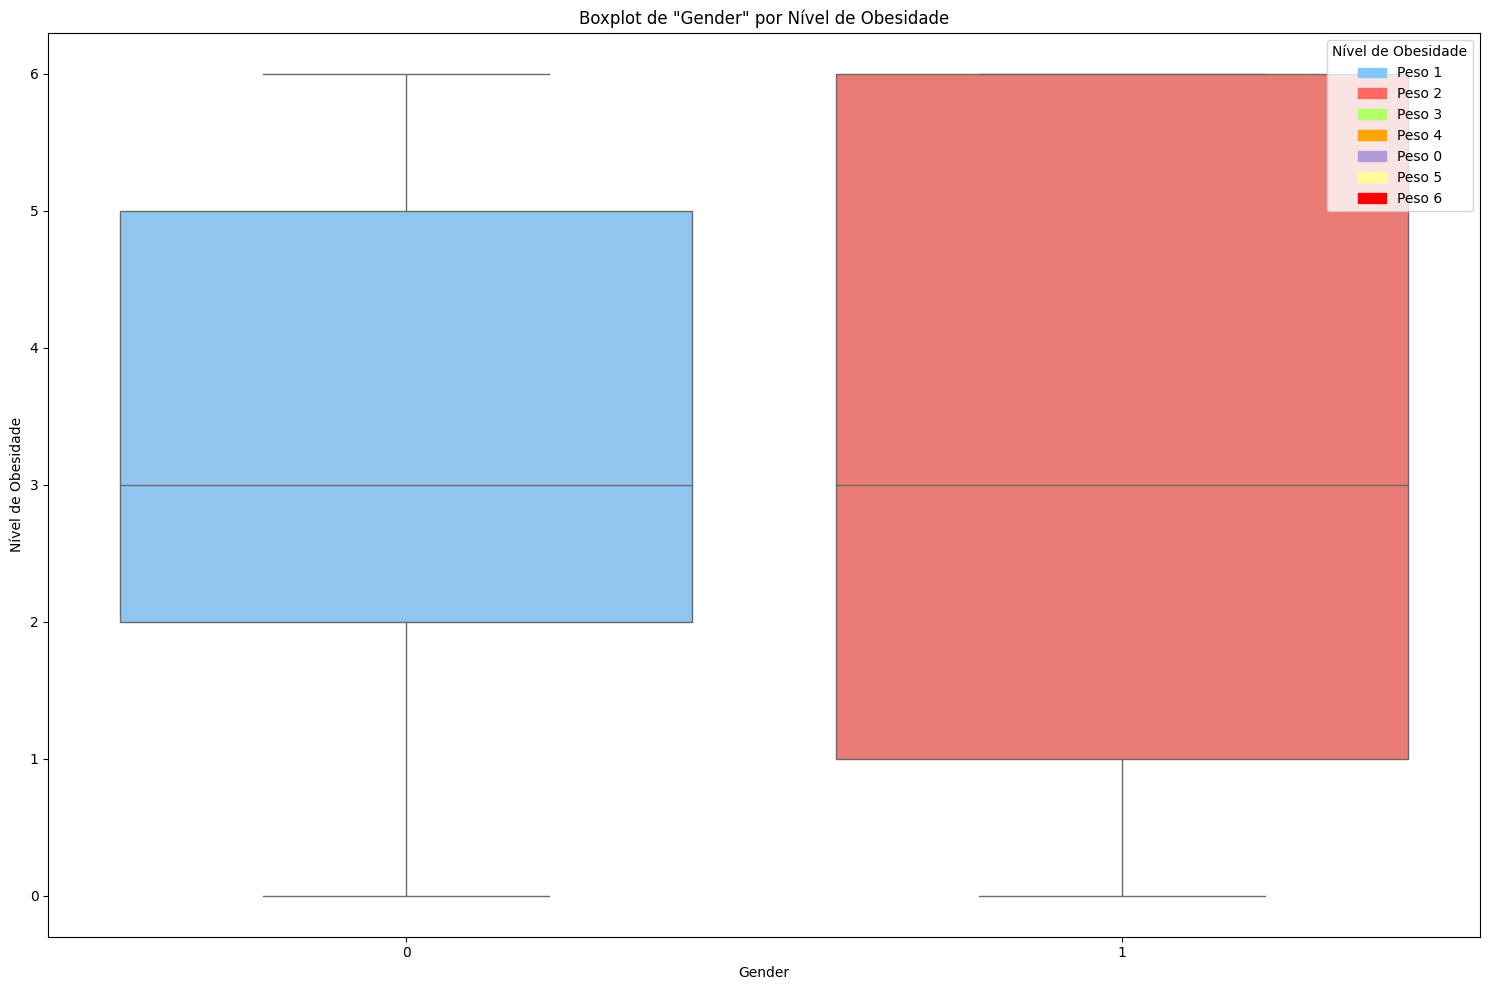

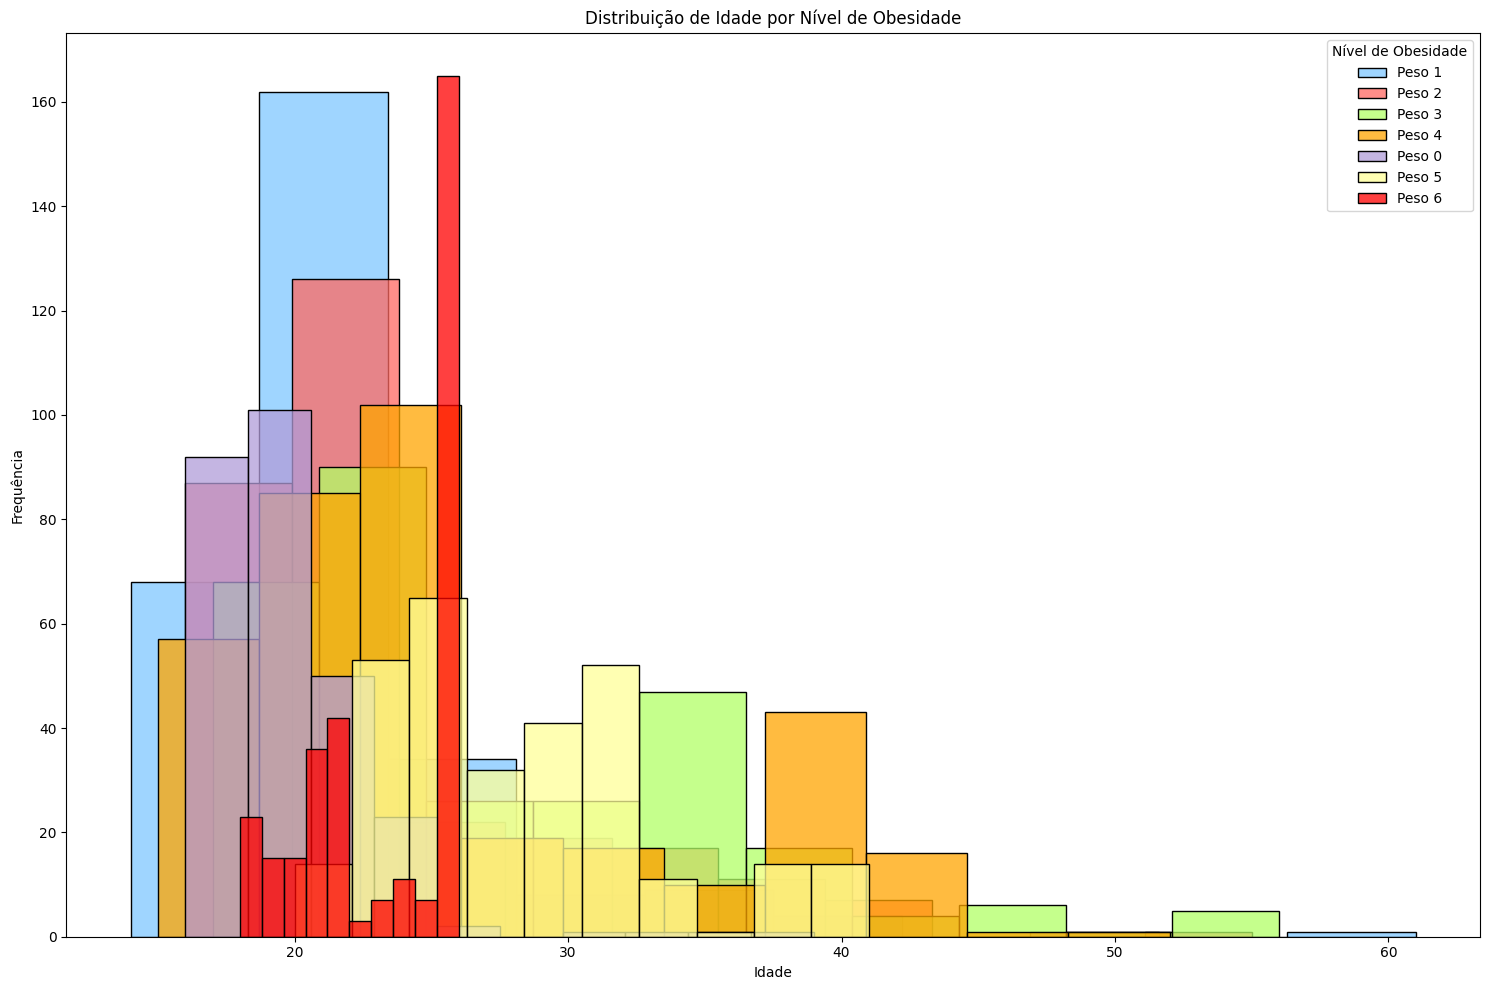

C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)
C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)


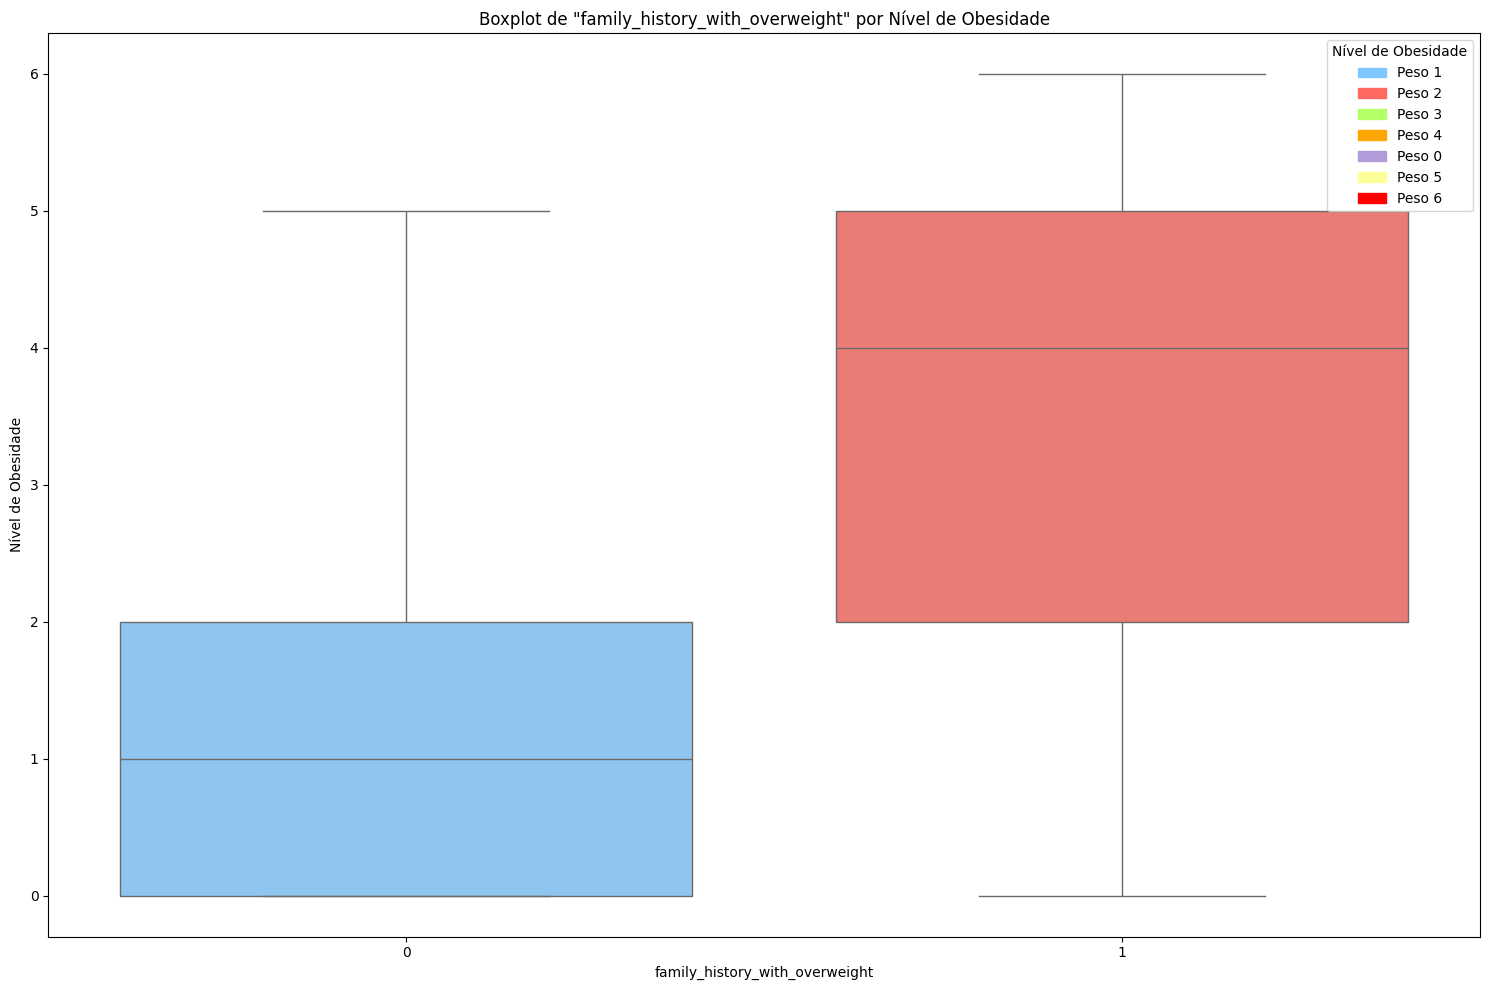

C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)
C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)


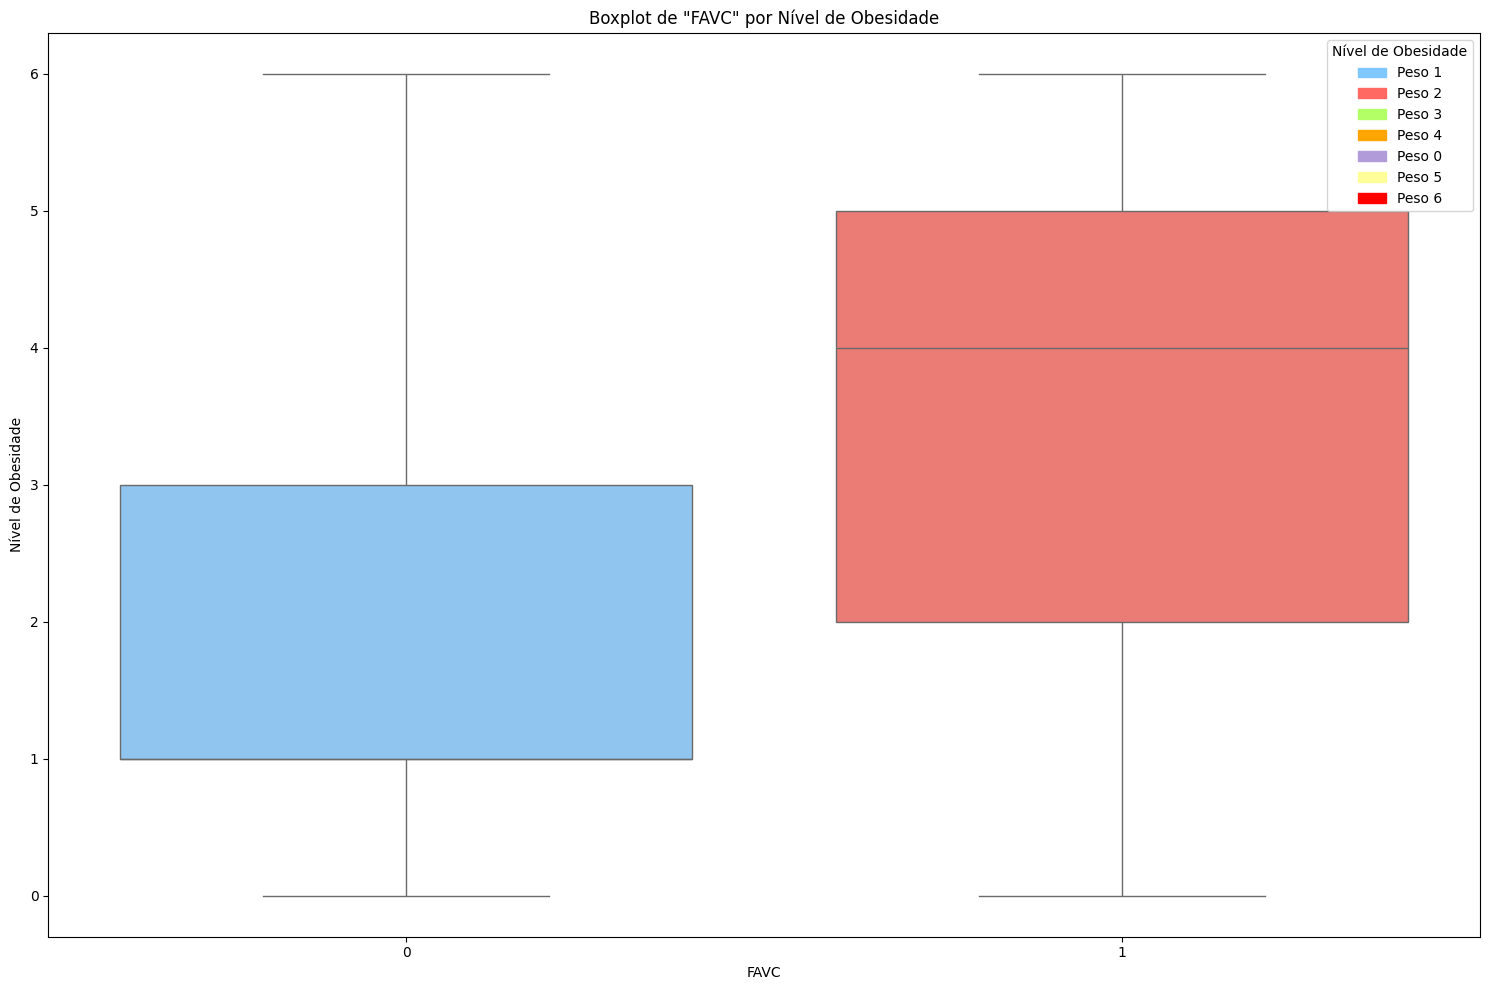

C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)
C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)


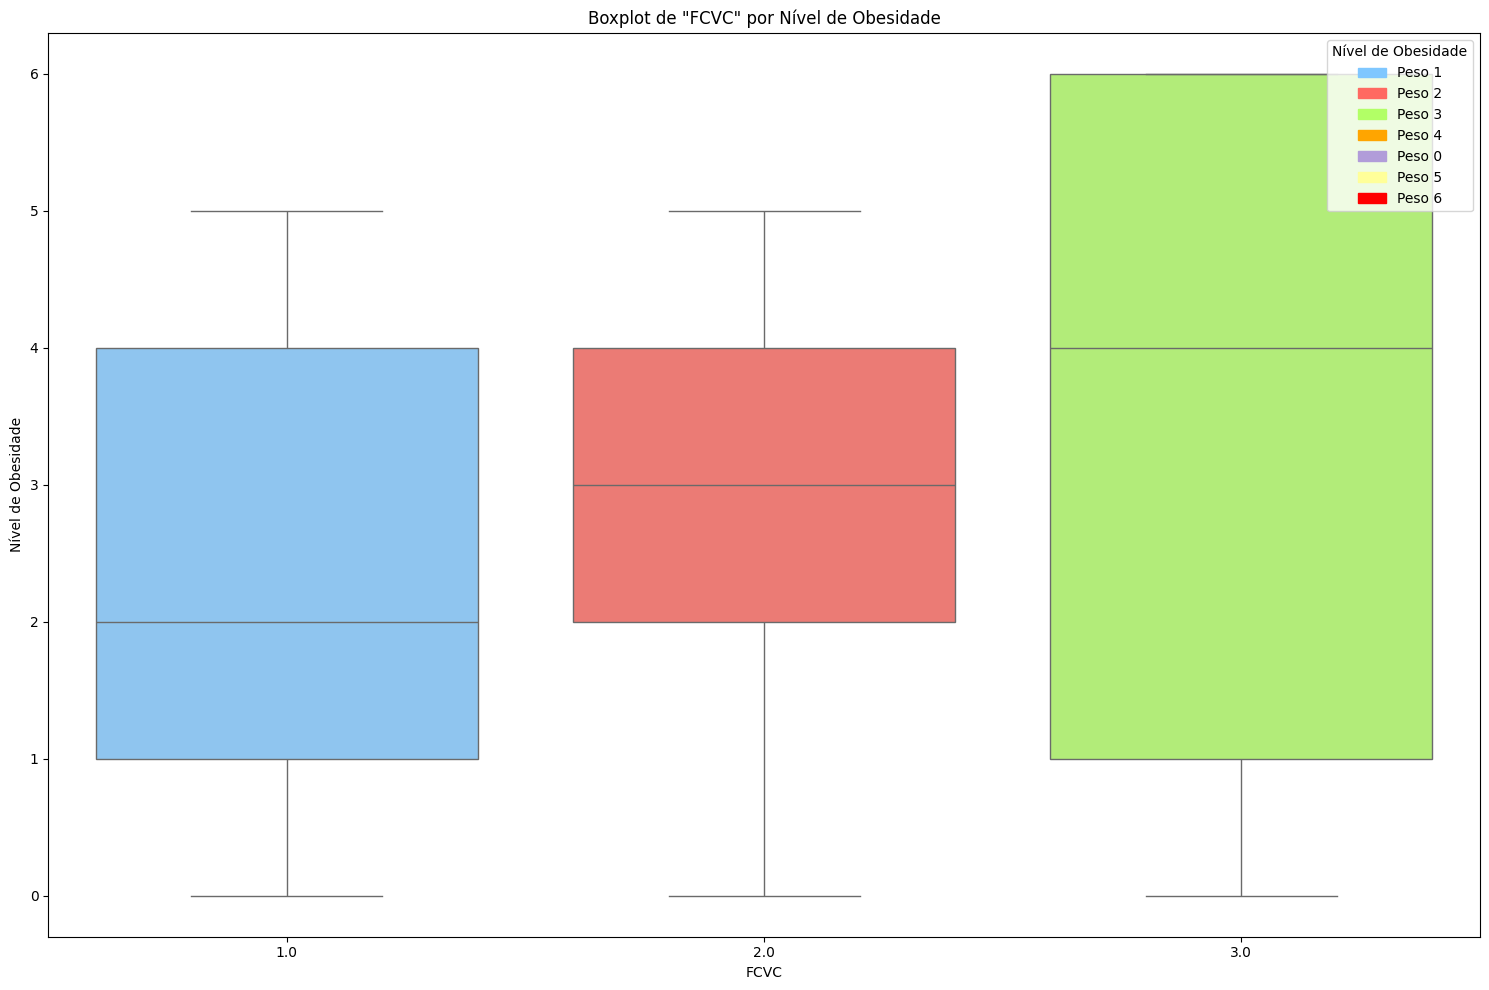

C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)
C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)


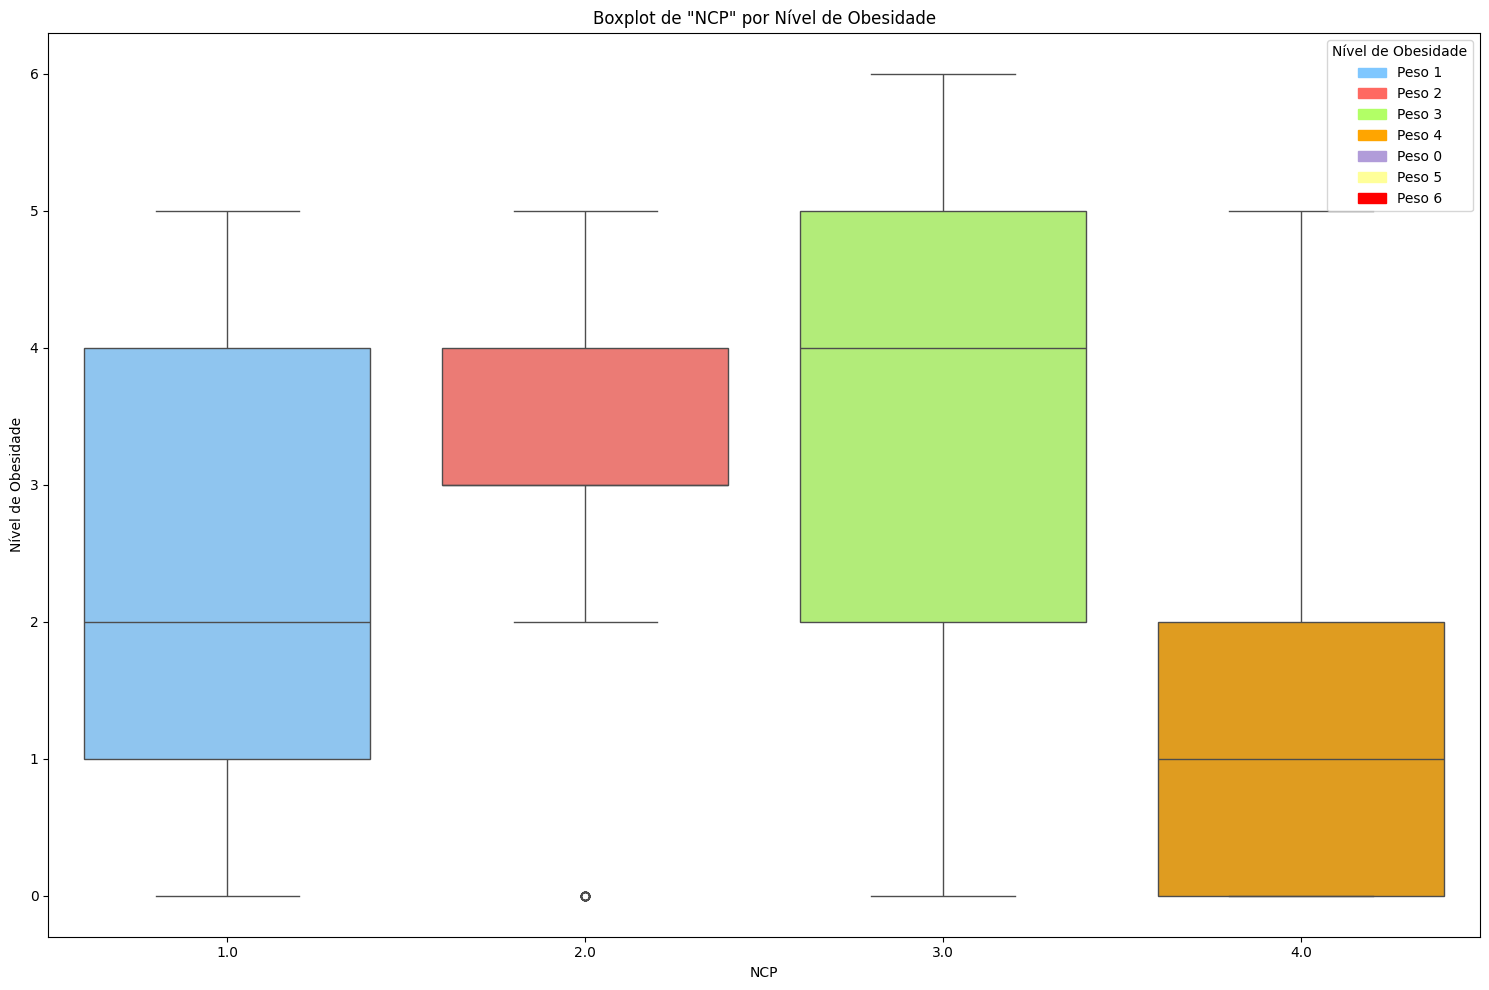

C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)
C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)


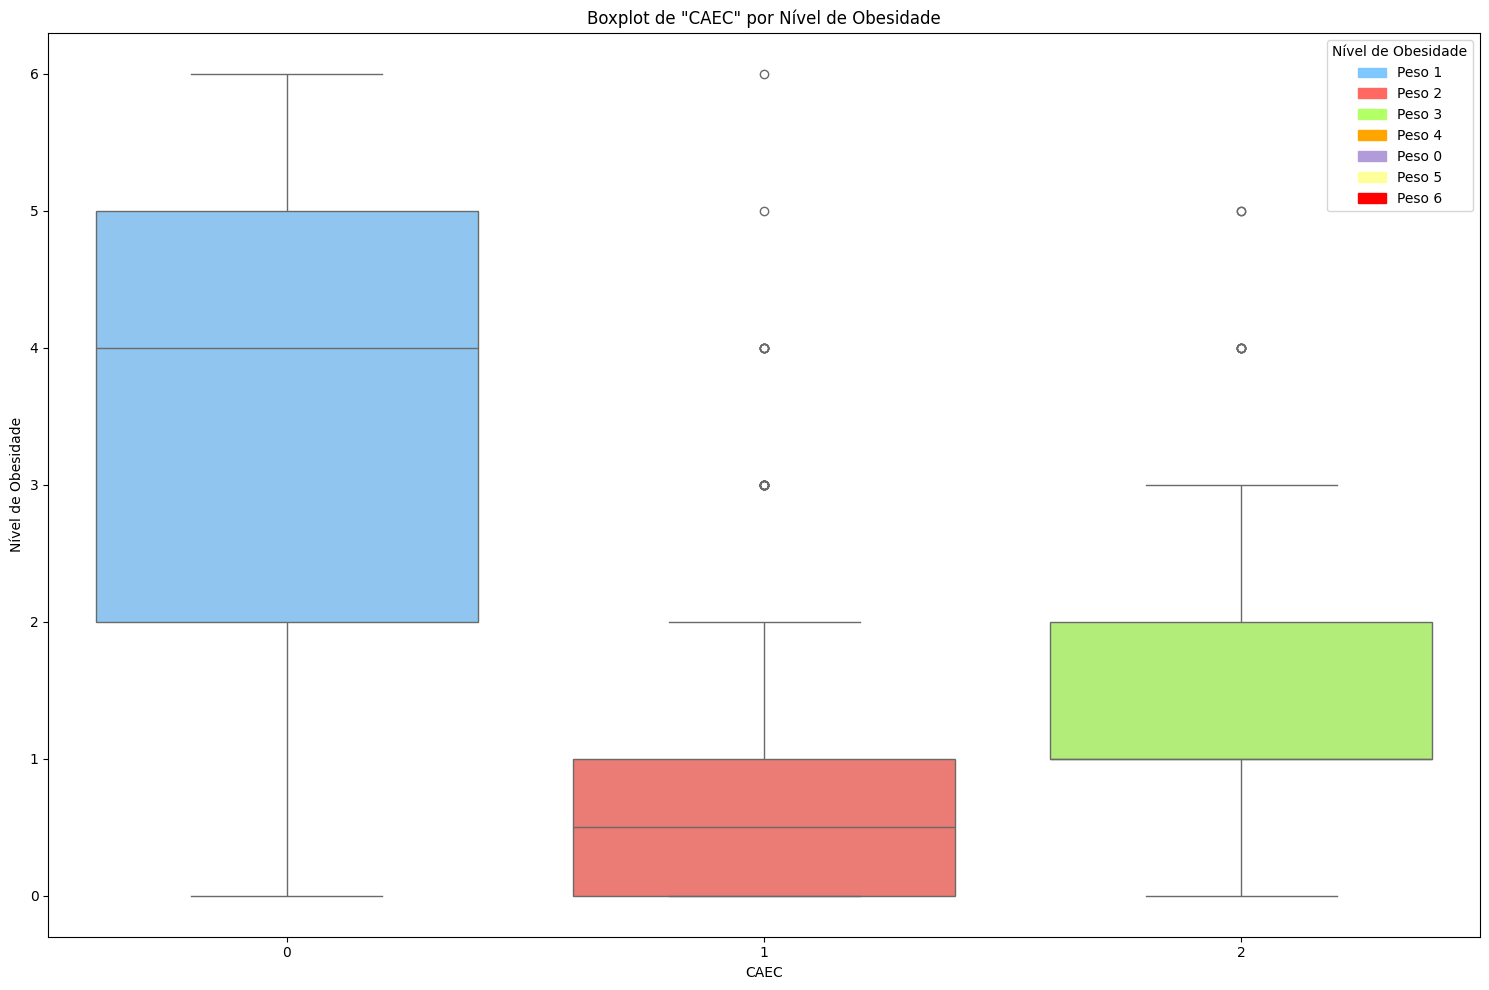

C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)
C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)


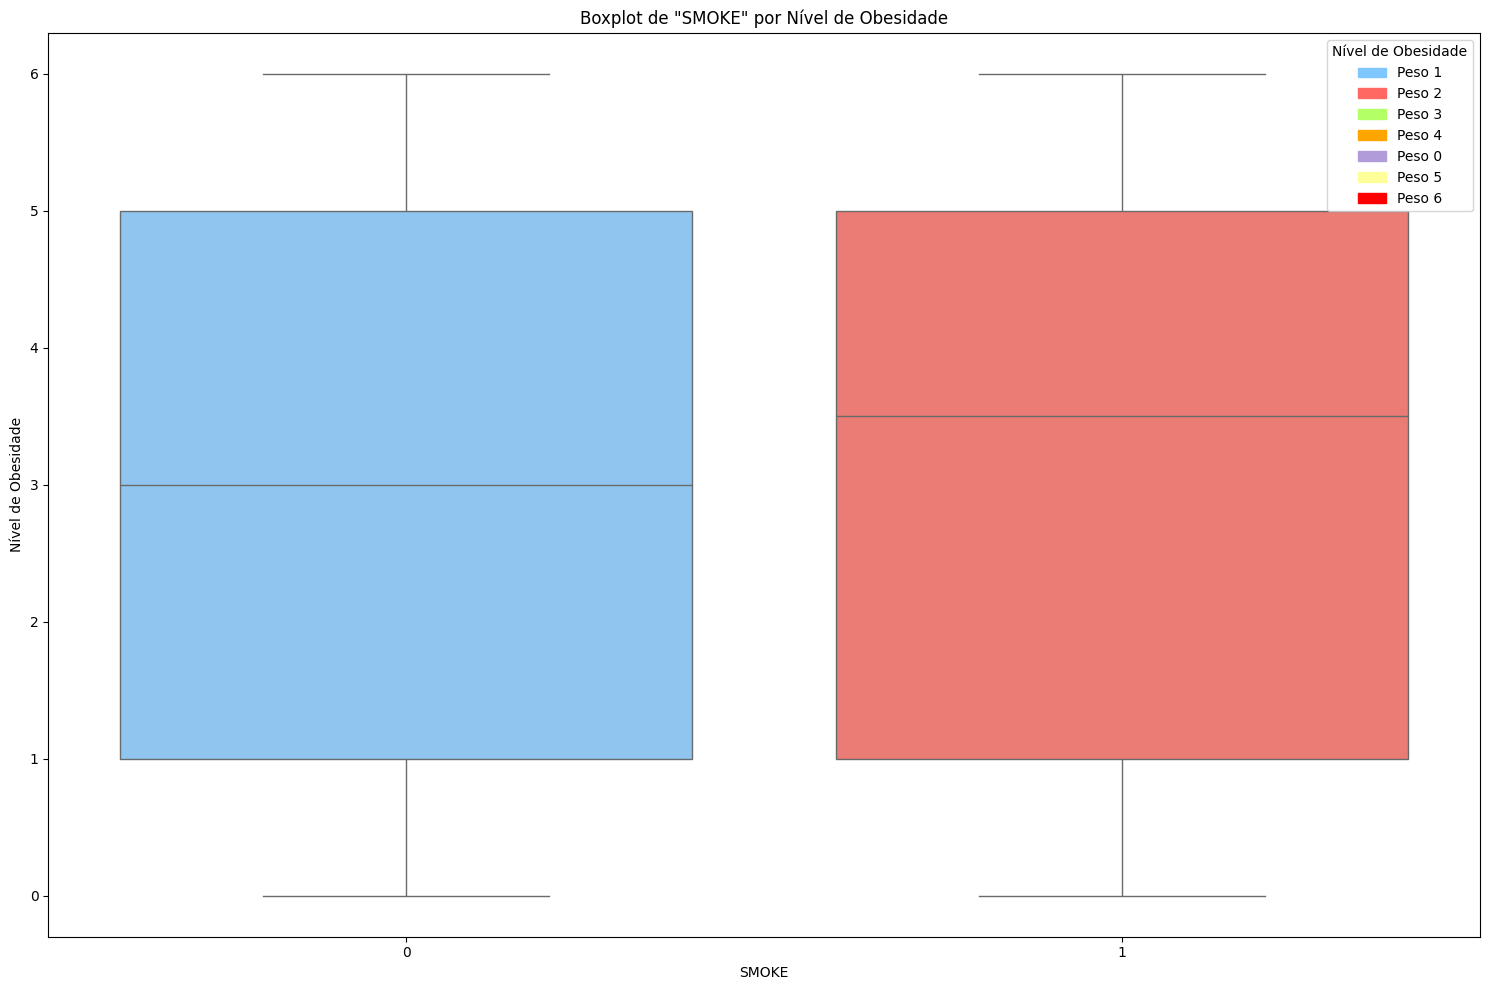

C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)
C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)


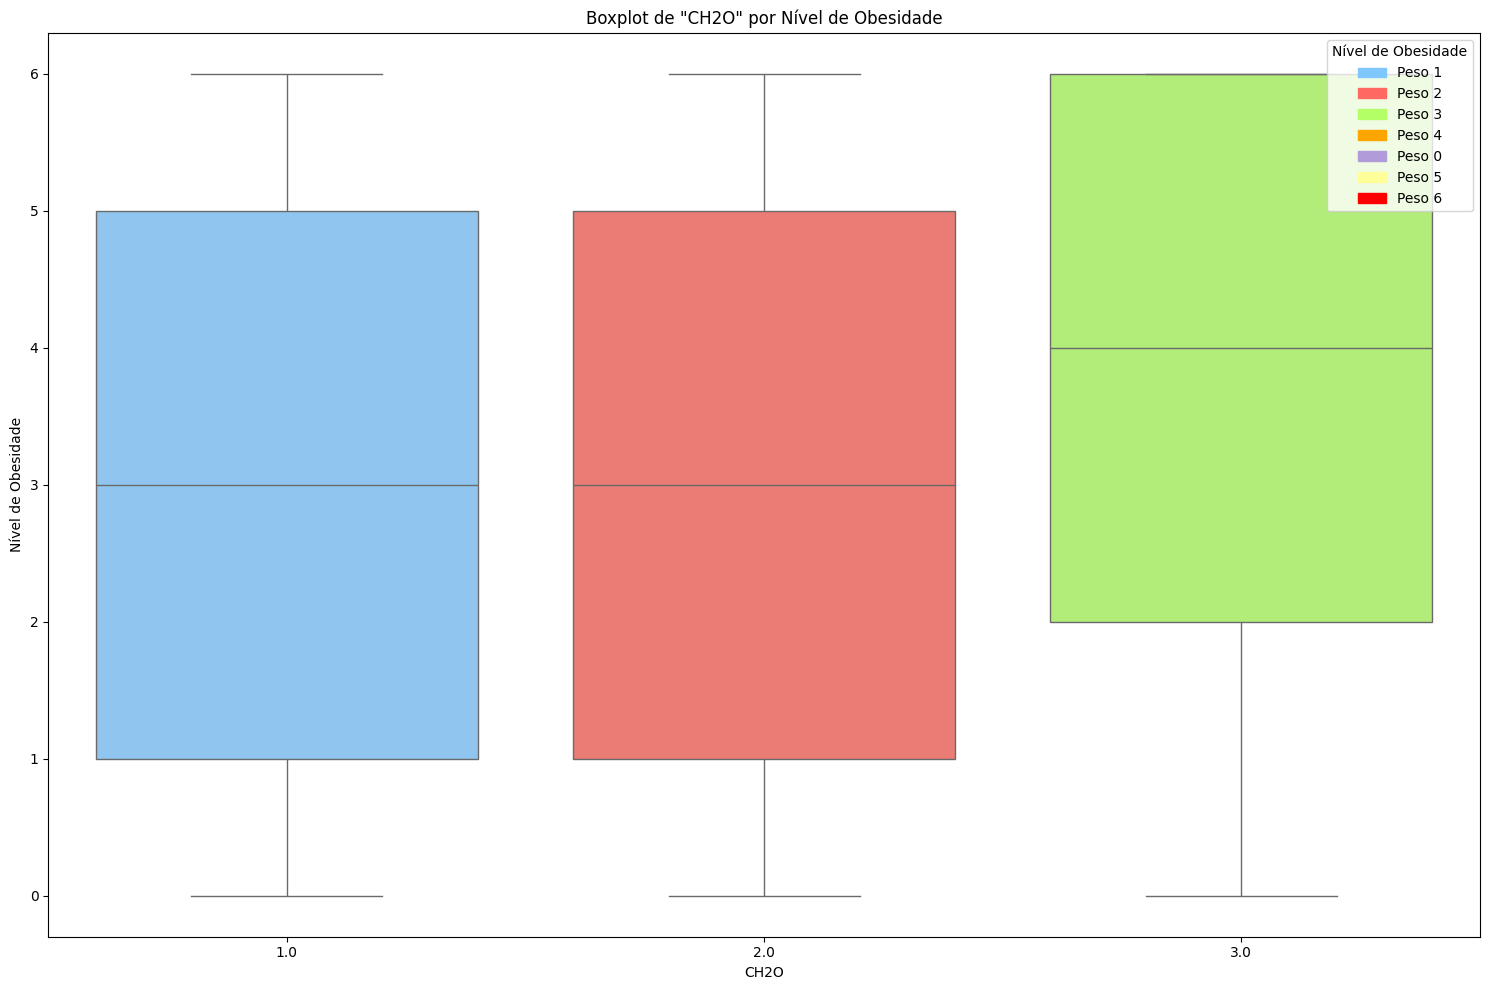

C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)
C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)


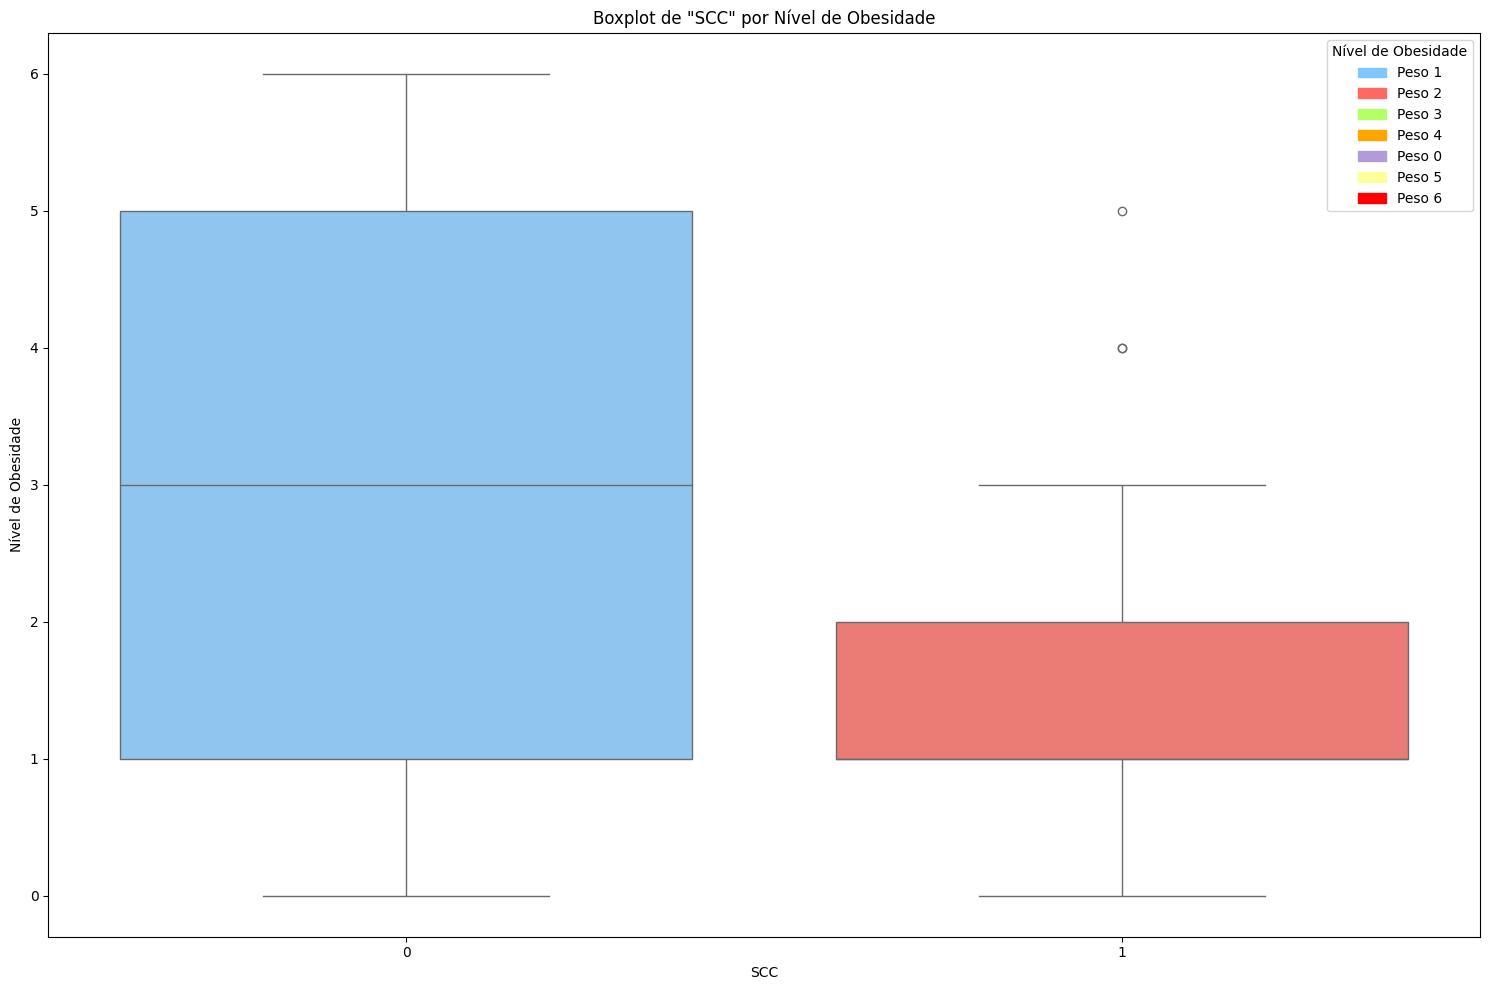

C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)
C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)


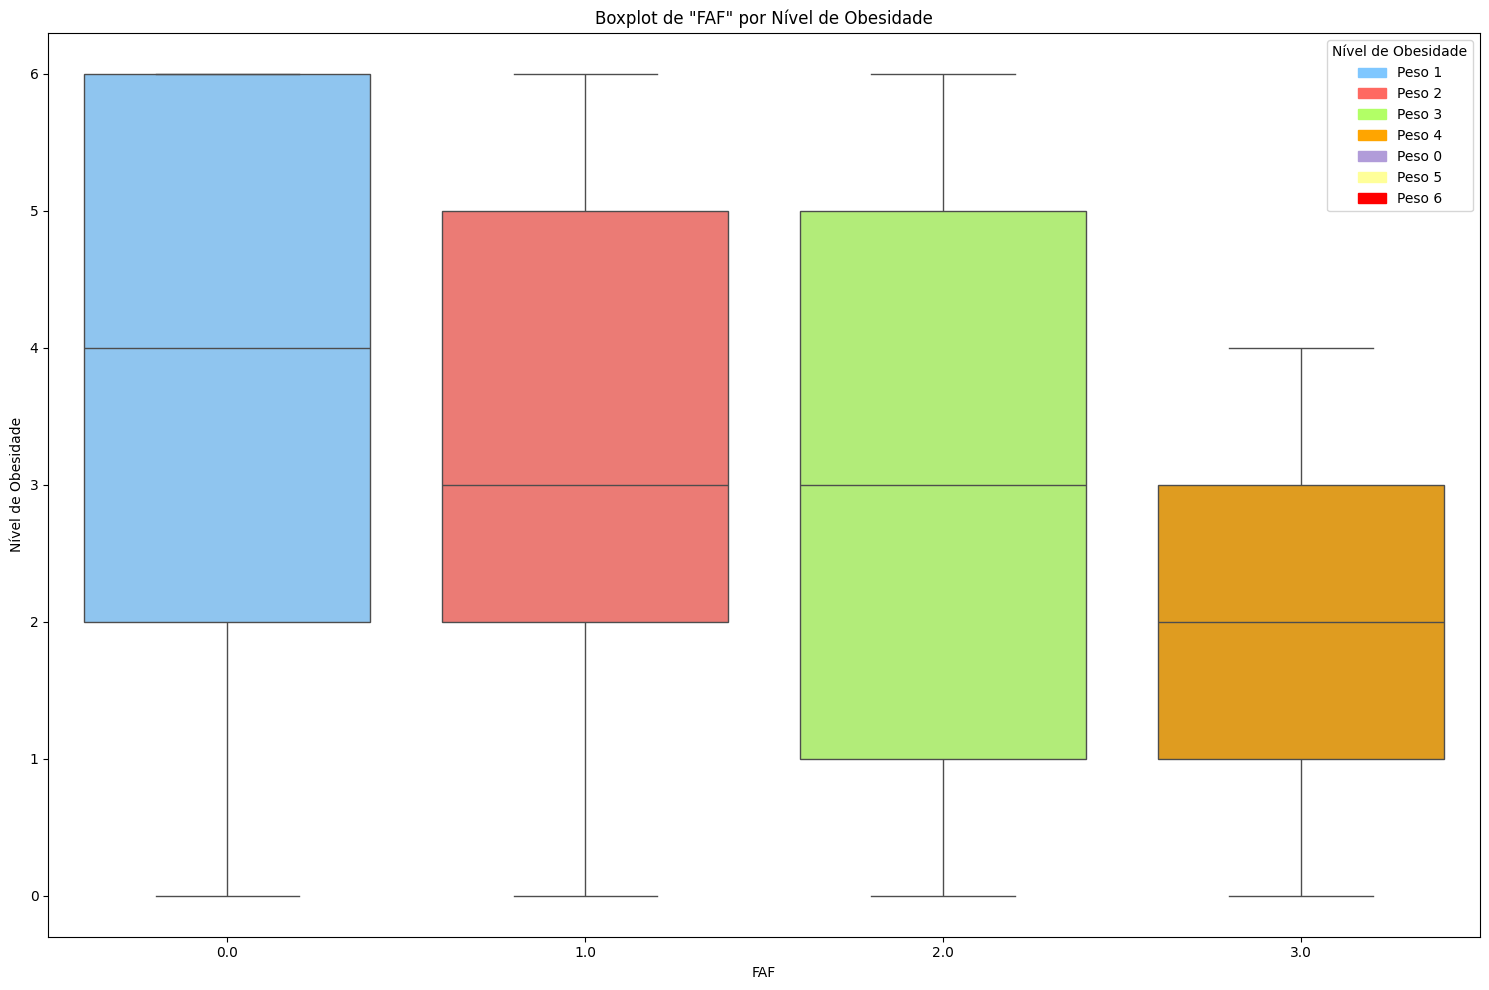

C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)
C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)


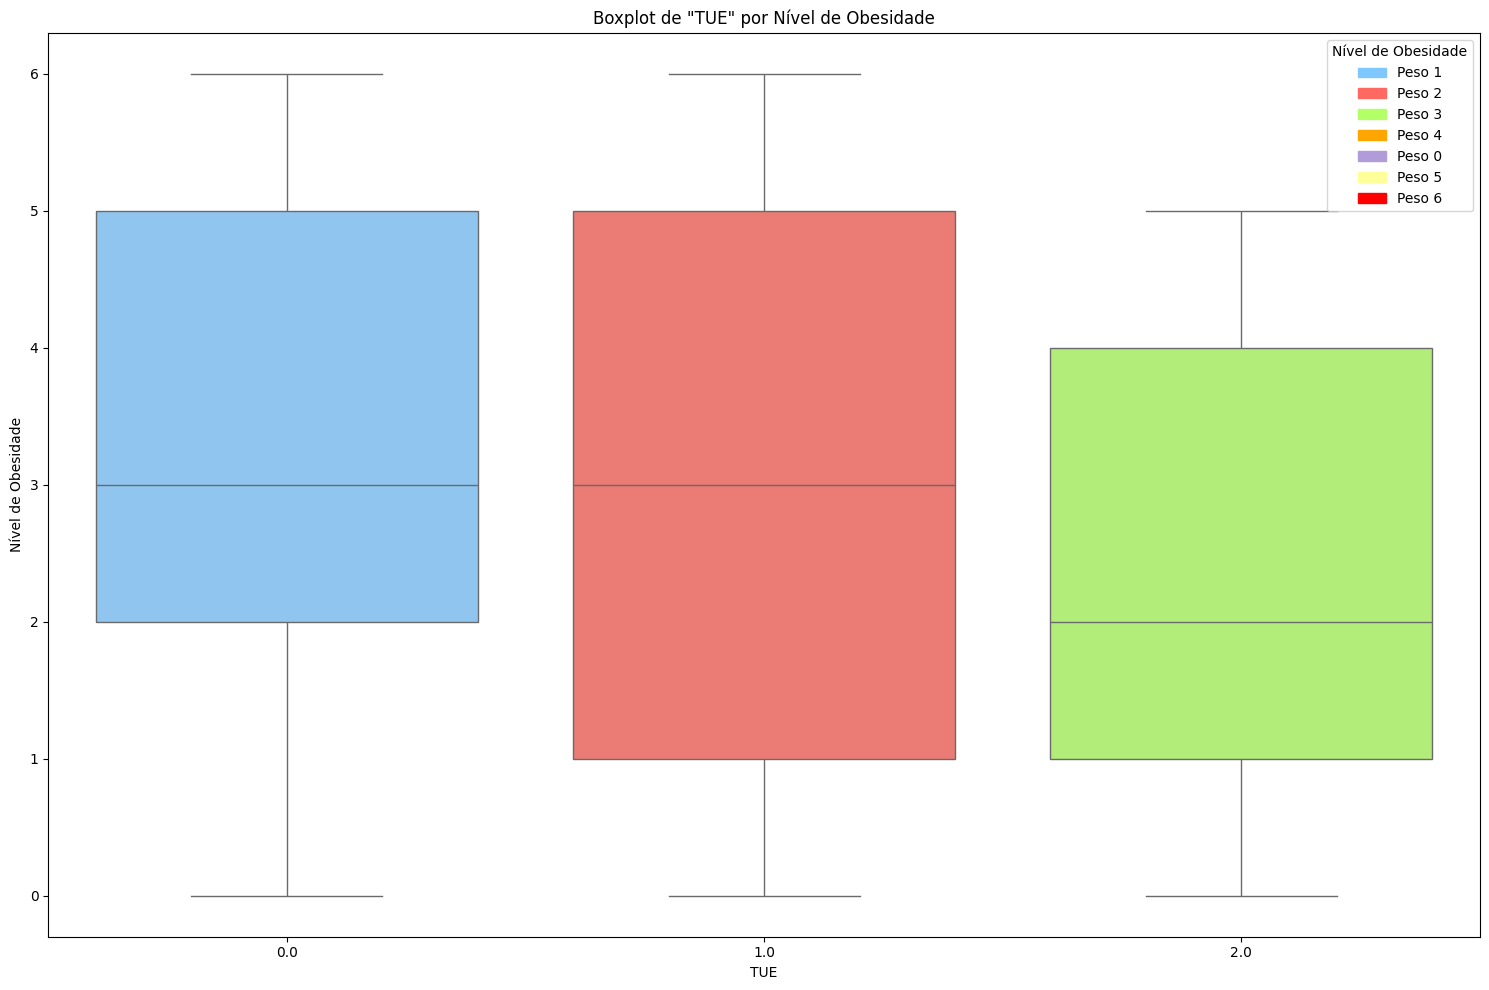

C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)
C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)


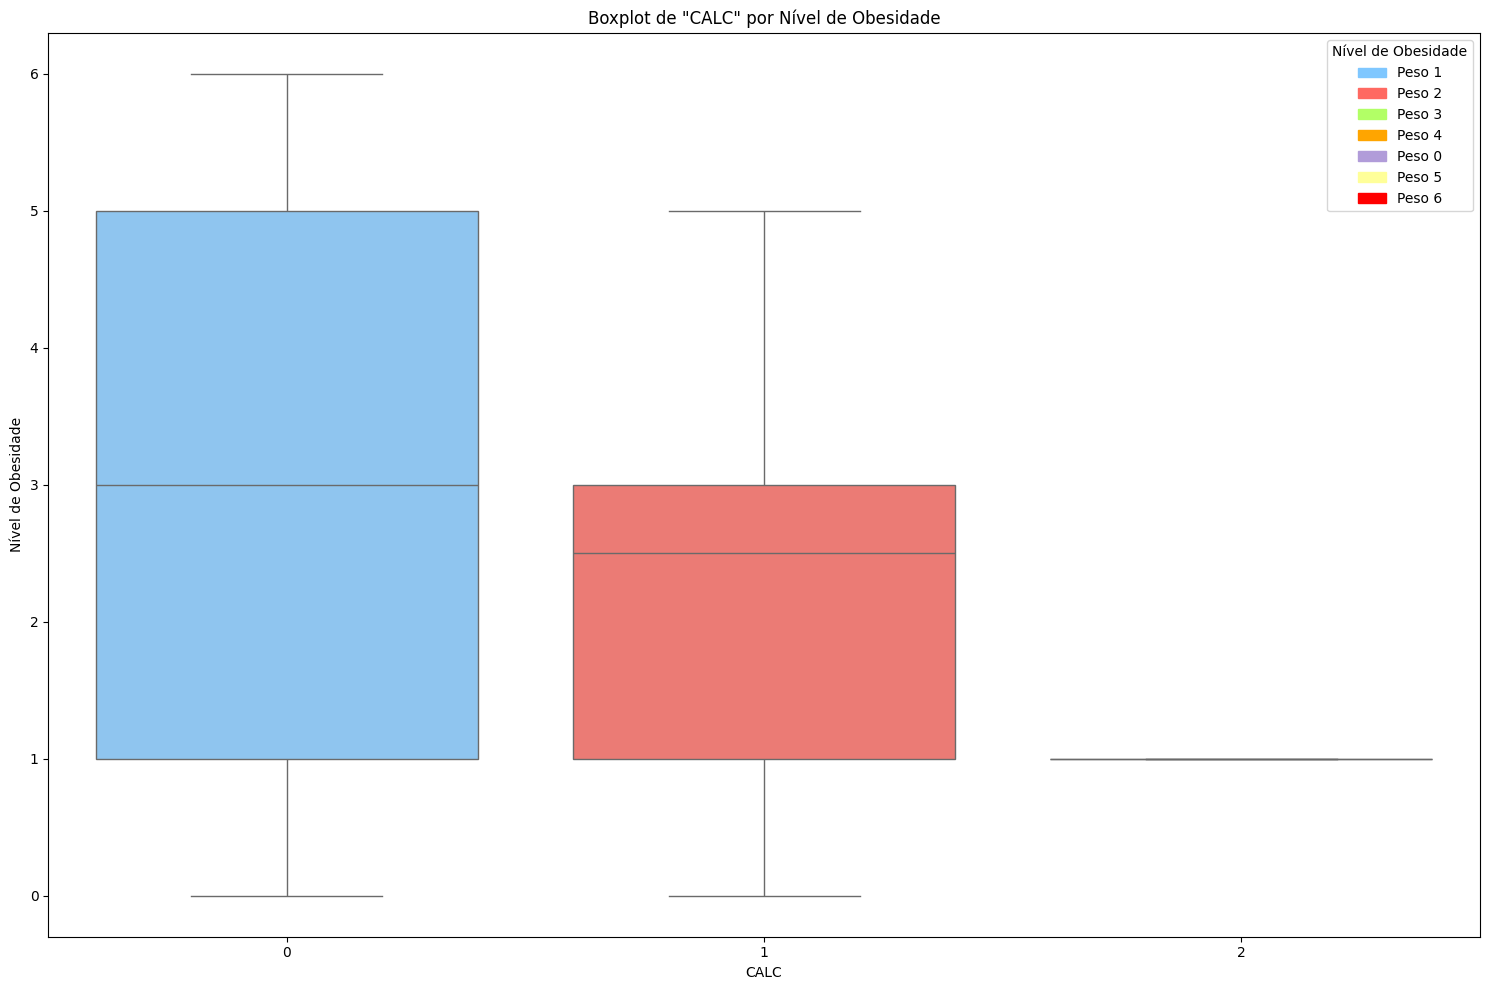

C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)
C:\Users\b47133\AppData\Local\Temp\ipykernel_11960\240029722.py:20: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)


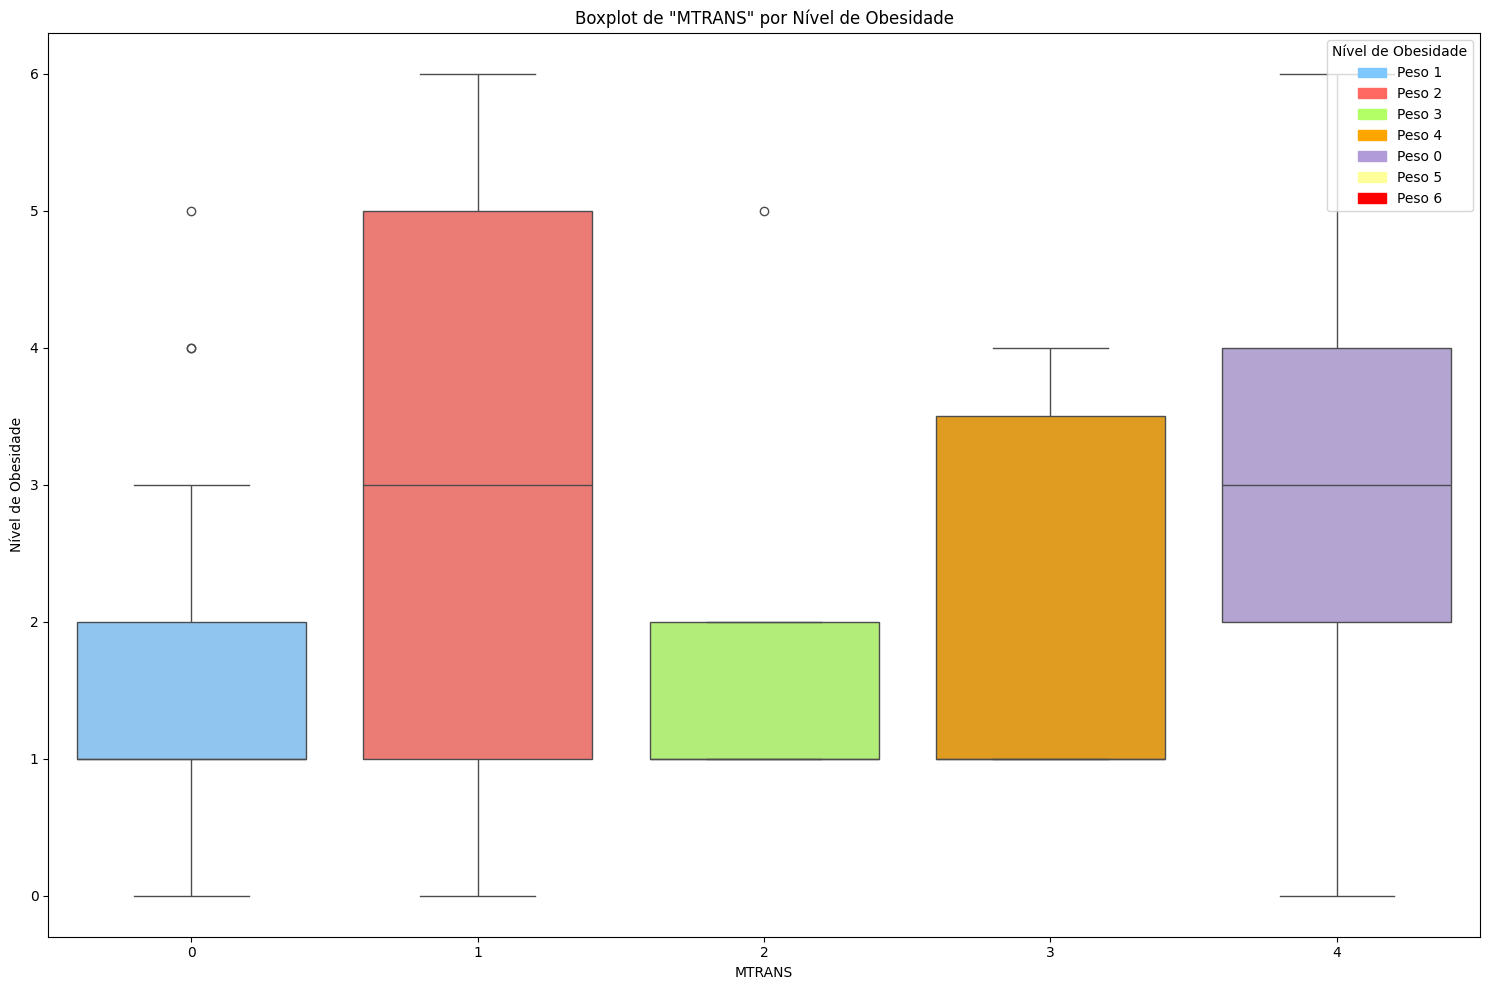

In [99]:
for c in list_columns:
    if c == "Age":
        # Plotar a frequência de idade agrupada por nível de obesidade
        plt.figure(figsize=(15, 10))
        for i, categoria in enumerate(weight_levels):
            min_data = data[data["NObeyesdad"] == categoria]
            sns.histplot(min_data['Age'], color=colors[i], label=f'Peso {categoria}', kde=False, bins=10)
        
        plt.title('Distribuição de Idade por Nível de Obesidade')
        plt.xlabel('Idade')
        plt.ylabel('Frequência')
        plt.legend(title='Nível de Obesidade')
        plt.tight_layout()
        plt.savefig(f"./plots/plt_{c}_frequencia.png")
        plt.show()
                
    else:
        # Plotar boxplot para variáveis categóricas agrupadas por nível de obesidade
        plt.figure(figsize=(15, 10))
        sns.boxplot(data=data, x=c, y='NObeyesdad', palette=colors)
        plt.title(f'Boxplot de "{c}" por Nível de Obesidade')
        plt.xlabel(c)
        plt.ylabel('Nível de Obesidade')
        
        # Criar a legenda personalizada
        handles = [mpatches.Patch(color=colors[i], label=f'Peso {weight_levels[i]}') for i in range(len(weight_levels))]
        plt.legend(handles=handles, title='Nível de Obesidade', loc='upper right')
        
        plt.tight_layout()
        plt.savefig(f"./plots/plt_{c}_boxplot.png")
        plt.show()

<Figure size 1000x800 with 0 Axes>

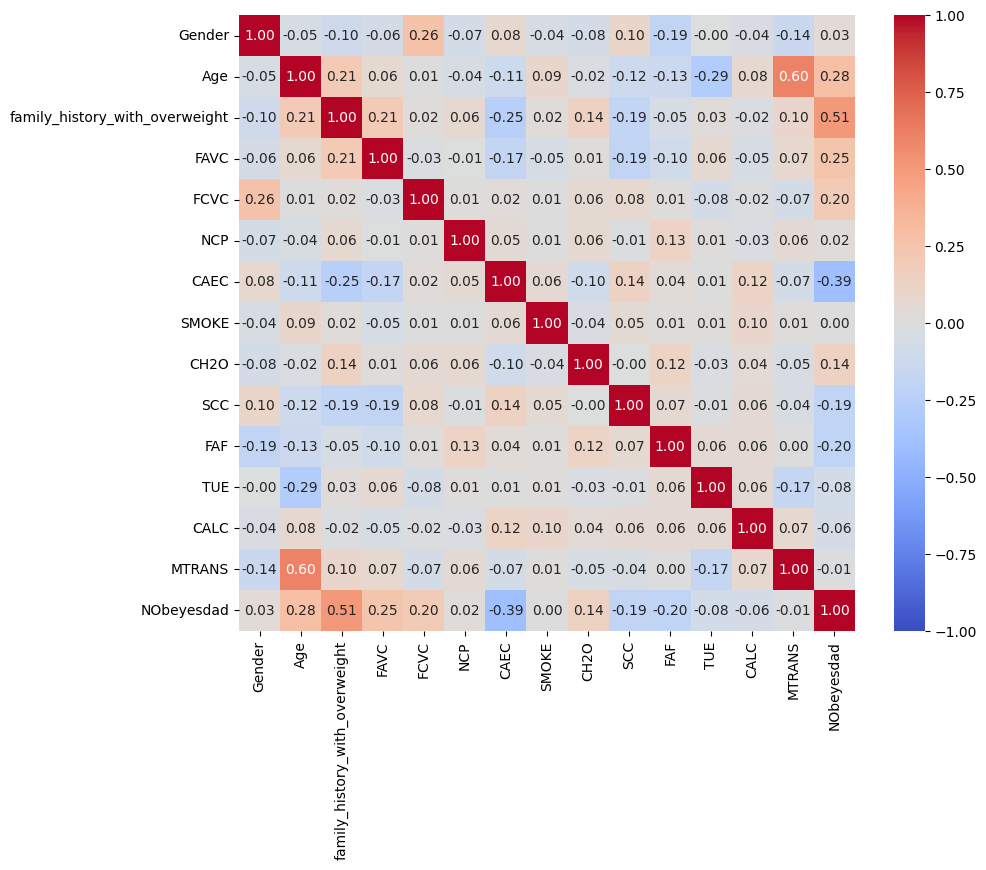

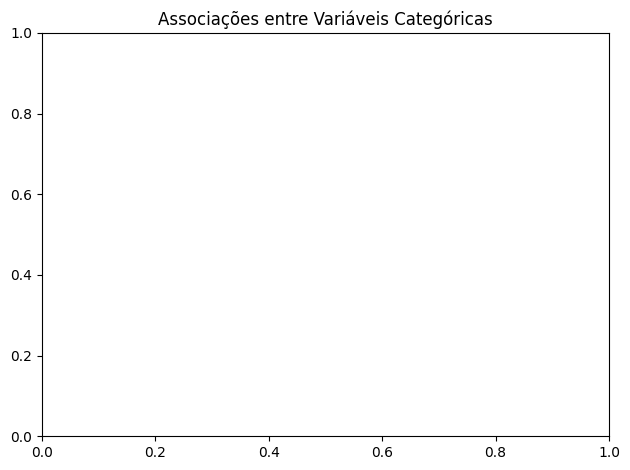

In [18]:
import matplotlib.pyplot as plt
from dython.nominal import associations

# Calcular as associações entre variáveis categóricas
plt.figure(figsize=(10, 8))  # Ajuste o tamanho da figura conforme necessário
associations(data, figsize=(10, 8), cmap='coolwarm', annot=True, filename="./plots/heatmap_covMatrix")  # Escolha uma paleta de cores e adicione anotações

plt.title('Associações entre Variáveis Categóricas')  # Adicione um título à figura
plt.tight_layout()  # Ajuste o layout para evitar sobreposição de texto
plt.savefig("./plots/plt_covMatrix.png")
plt.show()

# Salvar a figura após exibir


In [34]:
data["Gender_FCVC"] = data["Gender"] * data["FCVC"]
data["Gender_FAF"] = data["Gender"] * data["FAF"]
data["FHWO_FCVC"] = data["family_history_with_overweight"] * data["FCVC"]
data["CAEC_FCVC"] = data["CAEC"] * data["FCVC"]
data

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_FCVC,Gender_FAF,FHWO_FCVC,CAEC_FCVC
0,1,21.000000,1,0,2.0,3.0,0,0,2.0,0,0.0,1.0,0,1,1,2.0,0.0,2.0,0.0
1,1,21.000000,1,0,3.0,3.0,0,1,3.0,1,3.0,0.0,0,1,1,3.0,3.0,3.0,0.0
2,0,23.000000,1,0,2.0,3.0,0,0,2.0,0,2.0,1.0,1,1,1,0.0,0.0,2.0,0.0
3,0,27.000000,0,0,3.0,3.0,0,0,2.0,0,2.0,0.0,1,0,2,0.0,0.0,0.0,0.0
4,0,22.000000,0,0,2.0,1.0,0,0,2.0,0,0.0,0.0,0,1,3,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1,1,3.0,3.0,0,0,2.0,0,2.0,1.0,0,1,6,3.0,2.0,3.0,0.0
2107,1,21.982942,1,1,3.0,3.0,0,0,2.0,0,1.0,1.0,0,1,6,3.0,1.0,3.0,0.0
2108,1,22.524036,1,1,3.0,3.0,0,0,2.0,0,1.0,1.0,0,1,6,3.0,1.0,3.0,0.0
2109,1,24.361936,1,1,3.0,3.0,0,0,3.0,0,1.0,1.0,0,1,6,3.0,1.0,3.0,0.0


In [254]:
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

# Model 1


In [255]:
independent_vars = ["family_history_with_overweight", "FAVC", "Age", "FCVC", "CAEC", "Gender", "FAF", "CH2O"]
X = X_train[independent_vars]
y = y_train

In [256]:
model = OrderedModel(y, X, distr='logit')
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 1.669795
         Iterations 6


In [257]:
print(result.summary())

                             OrderedModel Results                             
Dep. Variable:             NObeyesdad   Log-Likelihood:                -3170.9
Model:                   OrderedModel   AIC:                             6370.
Method:            Maximum Likelihood   BIC:                             6448.
Date:                Sun, 23 Jun 2024                                         
Time:                        17:43:33                                         
No. Observations:                1899                                         
Df Residuals:                    1885                                         
Df Model:                           8                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
family_history_with_overweight     2.2887      0.123     18.635      0.000       2.048     

In [258]:
xTest = X_test[independent_vars]

predicted_probabilities = result.predict(xTest)

# Convertendo as probabilidades previstas em classes preditas
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Convertendo y_test para uma lista de valores (se necessário)
y_test_values = y_test.values if isinstance(y_test, pd.Series) else y_test

In [259]:
from sklearn.metrics import confusion_matrix
# Calcular a matriz de confusão
cm = confusion_matrix(y_test_values, predicted_classes)
TP = np.diag(cm)  # True Positives
FP = cm.sum(axis=0) - TP  # False Positives
FN = cm.sum(axis=1) - TP  # False Negatives
TN = cm.sum() - (TP + FP + FN)  # True Negatives

# Imprimir os valores calculados
for i in range(len(TP)):
    print(f'Classe {i}:')
    print(f'  TP = {TP[i]}')
    print(f'  TN = {TN[i]}')
    print(f'  FP = {FP[i]}')
    print(f'  FN = {FN[i]}')
    print()

# Calcular a acurácia
accuracy = np.sum(TP) / np.sum(cm)
print(f'Acurácia: {accuracy:.2f}')

Classe 0:
  TP = 7
  TN = 179
  FP = 15
  FN = 11

Classe 1:
  TP = 5
  TN = 177
  FP = 10
  FN = 20

Classe 2:
  TP = 6
  TN = 152
  FP = 21
  FN = 33

Classe 3:
  TP = 2
  TN = 180
  FP = 4
  FN = 26

Classe 4:
  TP = 24
  TN = 108
  FP = 72
  FN = 8

Classe 5:
  TP = 0
  TN = 183
  FP = 0
  FN = 29

Classe 6:
  TP = 29
  TN = 154
  FP = 17
  FN = 12

Acurácia: 0.34


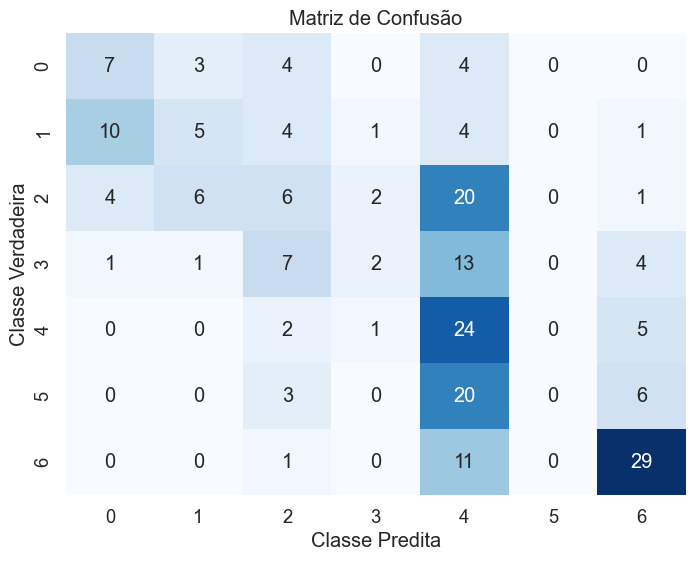

In [260]:
classes = np.unique(y_test_values)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.savefig("./results/confusionMatrix_M!.png")
plt.show()

In [261]:
print(np.exp(result.params))

family_history_with_overweight     9.862529
FAVC                               2.214407
Age                                1.045784
FCVC                               2.099602
CAEC                               0.234178
Gender                             1.053820
FAF                                0.684447
CH2O                               1.349024
0/1                               14.402408
1/2                                1.323608
2/3                                0.975140
3/4                                0.816799
4/5                                0.956538
5/6                                1.037887
dtype: float64


# Model 2

In [262]:
independent_vars = ["family_history_with_overweight", "FAVC", "Age", "FCVC", "CAEC", 
                    "Gender", "FAF", "CH2O", "Gender_FCVC", "Gender_FAF", "FHWO_FCVC", 
                    "CAEC_FCVC"]
X = X_train[independent_vars]
y = y_train

In [263]:
model = OrderedModel(y, X, distr='logit')
result = model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 1.614908
         Iterations: 78
         Function evaluations: 83
         Gradient evaluations: 83


In [264]:
print(result.summary())

                             OrderedModel Results                             
Dep. Variable:             NObeyesdad   Log-Likelihood:                -3066.7
Model:                   OrderedModel   AIC:                             6169.
Method:            Maximum Likelihood   BIC:                             6269.
Date:                Sun, 23 Jun 2024                                         
Time:                        17:43:37                                         
No. Observations:                1899                                         
Df Residuals:                    1881                                         
Df Model:                          12                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
family_history_with_overweight    -0.7896      0.454     -1.740      0.082      -1.679     

In [265]:
xTest = X_test[independent_vars]

predicted_probabilities = result.predict(xTest)

# Convertendo as probabilidades previstas em classes preditas
predicted_classes = np.argmax(predicted_probabilities, axis=1)
# Convertendo y_test para uma lista de valores (se necessário)
y_test_values = y_test.values if isinstance(y_test, pd.Series) else y_test

In [266]:
from sklearn.metrics import confusion_matrix
# Calcular a matriz de confusão
cm = confusion_matrix(y_test_values, predicted_classes)
TP = np.diag(cm)  # True Positives
FP = cm.sum(axis=0) - TP  # False Positives
FN = cm.sum(axis=1) - TP  # False Negatives
TN = cm.sum() - (TP + FP + FN)  # True Negatives

# Imprimir os valores calculados
for i in range(len(TP)):
    print(f'Classe {i}:')
    print(f'  TP = {TP[i]}')
    print(f'  TN = {TN[i]}')
    print(f'  FP = {FP[i]}')
    print(f'  FN = {FN[i]}')
    print()

# Calcular a acurácia
accuracy = np.sum(TP) / np.sum(cm)
print(f'Acurácia: {accuracy:.2f}')

Classe 0:
  TP = 7
  TN = 177
  FP = 17
  FN = 11

Classe 1:
  TP = 7
  TN = 174
  FP = 13
  FN = 18

Classe 2:
  TP = 5
  TN = 155
  FP = 18
  FN = 34

Classe 3:
  TP = 0
  TN = 176
  FP = 8
  FN = 28

Classe 4:
  TP = 20
  TN = 122
  FP = 58
  FN = 12

Classe 5:
  TP = 6
  TN = 169
  FP = 14
  FN = 23

Classe 6:
  TP = 32
  TN = 164
  FP = 7
  FN = 9

Acurácia: 0.36


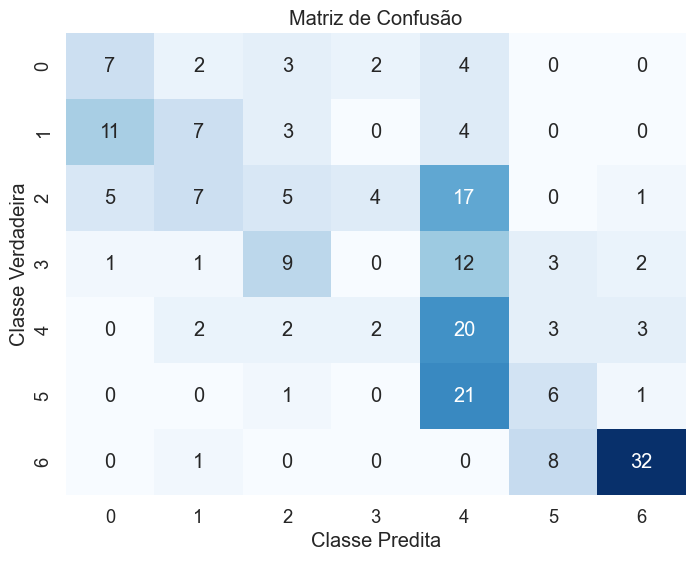

In [267]:
classes = np.unique(y_test_values)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.savefig("./results/confusionMatrix_M2.png")
plt.show()

In [268]:
print(np.exp(result.params))

family_history_with_overweight    0.454040
FAVC                              2.022506
Age                               1.055441
FCVC                              0.385005
CAEC                              3.443064
Gender                            0.018488
FAF                               0.738725
CH2O                              1.186493
Gender_FCVC                       5.760742
Gender_FAF                        0.906393
FHWO_FCVC                         3.918818
CAEC_FCVC                         0.309895
0/1                               0.273409
1/2                               1.379619
2/3                               1.014493
3/4                               0.849056
4/5                               1.009126
5/6                               1.177719
dtype: float64
